# 1. 라이브러리 불러오기

In [76]:
import pandas as pd
import numpy as np

pd.set_option('max.columns', 1000)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

plt.rcParams['font.family'] = 'AppleGothic'
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

import warnings
warnings.filterwarnings(action = 'ignore')

from scipy import stats

import scikit_posthocs as sp
import pingouin as pg
import statsmodels.api as sm

# 2. 데이터 불러오기

In [2]:
# 데이터 확인
raw_data = pd.read_csv('data/train_mdf.csv')

print('Shape of Data :', raw_data.shape, '\n')
print('-' * 50)
print(raw_data.info())

Shape of Data : (1460, 81) 

--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1

# 3. 결측치 처리

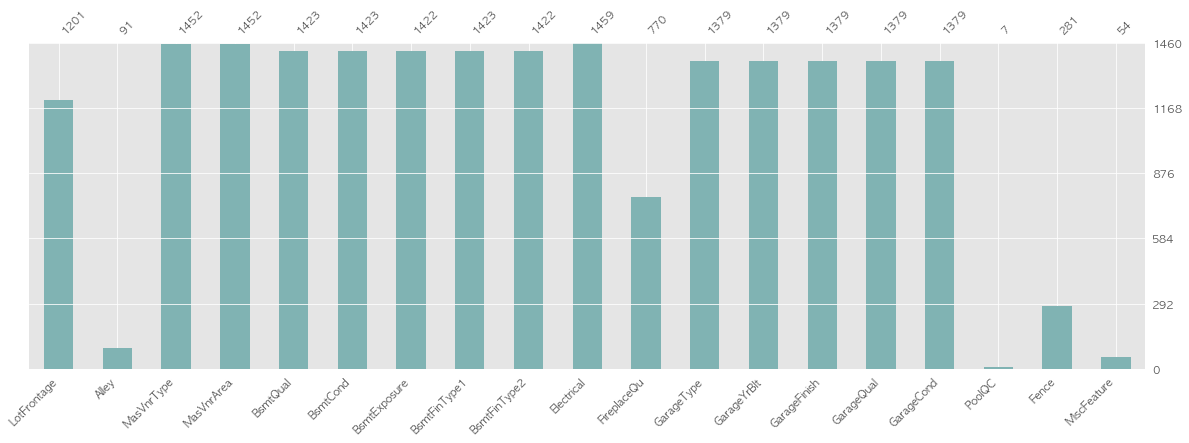

In [3]:
# 결측치를 포함하고 있는 features 추출
null_data = pd.DataFrame(raw_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(raw_data[null_list], color = (0.5, 0.7, 0.7), fontsize = 11, figsize = (20, 6))
plt.yticks([])
plt.show()

In [4]:
object_list = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
               'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
               'PoolQC', 'Fence', 'MiscFeature']

# 원래 데이터를 보존하기 위해 새로운 DataFrame 생성
modify_data = raw_data.copy()

# 결측치를 의미하지 않는 값에 'No have' 채워넣기
for feature in object_list:
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *Before Modify* :'.format(feature), null_data, '\n')
    
    modify_data.loc[modify_data[feature].isnull(), feature] = 'No have'
    
    null_data = modify_data[feature].isnull().sum()
    print('Number of null values of {} *After Modify* :'.format(feature), null_data)
    print('-' * 60)

Number of null values of Alley *Before Modify* : 1369 

Number of null values of Alley *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtQual *Before Modify* : 37 

Number of null values of BsmtQual *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtCond *Before Modify* : 37 

Number of null values of BsmtCond *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtExposure *Before Modify* : 38 

Number of null values of BsmtExposure *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType1 *Before Modify* : 37 

Number of null values of BsmtFinType1 *After Modify* : 0
------------------------------------------------------------
Number of null values of BsmtFinType2 *Before Modify* : 38 

Number of null values of BsmtFinType2 *After Modify* : 0
---------------

In [5]:
print('Number of null values of GarageYrBlt *Before Modify* :', modify_data['GarageYrBlt'].isnull().sum(), '\n')

# 결측치 대체
modify_data.loc[modify_data['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 9999
print('Number of null values of GarageYrBlt *After Modify* :', modify_data['GarageYrBlt'].isnull().sum())

Number of null values of GarageYrBlt *Before Modify* : 81 

Number of null values of GarageYrBlt *After Modify* : 0


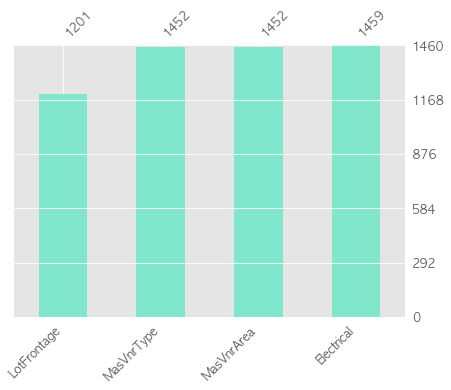

In [7]:
# 변경해준 뒤 결측치 확인
null_data = pd.DataFrame(modify_data.isnull().sum(), columns = ['Count'])
null_list = null_data[null_data['Count'] > 0].index

# 추출 후 시각화
msno.bar(modify_data[null_list], color = (0.5, 0.9, 0.8), fontsize = 12, figsize = (7, 5))
plt.yticks([])
plt.show()

In [10]:
print('Number of null values of MasVnrType *Before* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *Before* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *Before* :', modify_data['Electrical'].isnull().sum(), '\n')

modify_data['MasVnrType'].fillna('None', inplace = True)
modify_data['MasVnrArea'].fillna(0, inplace = True)
modify_data['Electrical'].fillna(modify_data['Electrical'].mode()[0], inplace = True)

print('Number of null values of MasVnrType *After* :', modify_data['MasVnrType'].isnull().sum(), '\n')
print('Number of null values of MasVnrArea *After* :', modify_data['MasVnrArea'].isnull().sum(), '\n')
print('Number of null values of Electrical *After* :', modify_data['Electrical'].isnull().sum())

Number of null values of MasVnrType *Before* : 8 

Number of null values of MasVnrArea *Before* : 8 

Number of null values of Electrical *Before* : 1 

Number of null values of MasVnrType *After* : 0 

Number of null values of MasVnrArea *After* : 0 

Number of null values of Electrical *After* : 0


In [11]:
# 'LotFrontage' 결측치를 대체해주는 함수 만들기
def imputer_lotfrontage(raw_data):
    
    print('Number of null values of LotFrontage *Before Modify* :', raw_data['LotFrontage'].isnull().sum(), '\n')
    
    # 'KNNImputer' 라이브러리 불러오기
    from sklearn.impute import KNNImputer
    
    # 'LotFrontage' 변수에 결측치를 가지는 'Id' 추출 후 저장
    miss_id = raw_data[raw_data['LotFrontage'].isnull()]['Id'].unique()
    
    # 'Id', 'LotFrontage', 'LotArea' 변수 추출 후 저장
    data = raw_data[['Id', 'LotFrontage', 'LotArea']]
    
    # 'LotFrontage' 변수의 값이 300 넘는 관측치를 삭제하기로 했으므로 삭제
    outlier_id = data[data['LotFrontage'] > 300]['Id']
    data = data[~data['Id'].isin(outlier_id)]
    
    # 'Id' 변수를 인덱스로 지정
    data = data.set_index('Id')
    
    # 'LotArea' 변수를 로그화 수행 후, 변수 삭제
    data['LotLogArea'] = data['LotArea'].apply(lambda x: np.log(x))
    data = data.drop('LotArea', axis = 1)
    
    # 모델 객체 생성 후 학습시키고 DataFrame으로 저장
    # 원본 데이터에 결측치로 기입되어 있는 관측치들만 수정해주기 위해 DataFrame을 만들 때, 인덱스를 위 데이터의 인덱스로 지정
    imputer = KNNImputer(n_neighbors = 5)
    pre_data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns, index = data.index)
    
    # 결측치가 존재하던 관측치만 저장
    pre_data = pre_data[pre_data.index.isin(miss_id)]
    
    # 원본 데이터 결측치를 대입해주는 과정
    for id_value, lot_value in zip(pre_data.index, pre_data['LotFrontage']):
        for index in raw_data.index:
            
            if raw_data.loc[index, 'Id'] == id_value:
                raw_data.loc[index, 'LotFrontage'] = lot_value
    
    print('Number of null values of LotFrontage *After Modify* :', raw_data['LotFrontage'].isnull().sum())
 
    return raw_data

In [12]:
# 생성한 함수 적용
modify_data = imputer_lotfrontage(modify_data)

Number of null values of LotFrontage *Before Modify* : 259 

Number of null values of LotFrontage *After Modify* : 0


# 4. 사용자 함수 정의

## 4.1. 독립표본 T검정 함수

In [34]:
# 독립표본 T-test를 수행하는 함수 생성
def t_test(x = None, y = None, data = None, alpha = None):
    
    # X의 고유한 값 추출
    first = data[x].unique()[0]
    second = data[x].unique()[1]
    
    # X의 고유한 값에 해당되는 데이터 추출
    first_data = data[data[x] == first]
    second_data = data[data[x] == second]
    
    # 표본의 크기가 충분하기 때문에 정규성은 충족한다는 가정하에 'Levene' 등분산 검정을 수행해주도록 한다.
    value, pval = stats.levene(first_data[y], second_data[y])
    
    # 등분산을 만족할 경우
    if pval > alpha:
        print('등분산 검정 결과 유의확률이 {}으로 유의수준 {}보다 크므로 대립가설을 기각할 수 있다.'.format(round(pval, 5), alpha), '\n')
        t_value, t_pval = stats.ttest_ind(first_data[y], second_data[y], equal_var = True)
        
        print('statistic =', round(t_value, 3), '\n')
        print('P-value =', round(t_pval, 3))
        
    # 등분산을 만족하지 않을 경우
    else:
        print('등분산 검정 결과 유의확률이 {}으로 유의수준 {}보다 작으므로 대립가설을 기각할 근거가 없다.'.format(pval, alpha), '\n')
        t_value, t_pval = stats.ttest_ind(first_data[y], second_data[y], equal_var = False)
        
        print('statistic =', round(t_value, 3), '\n')
        print('P-value =', round(t_pval, 3))

## 4.2. 분산분석 함수

In [72]:
# 분산분석을 수행하는 함수 만들기
def anova_test(*args, x = None, y = None, alpha = None, data = None):
    
    # 우선 정규성 검정을 먼저 해주도록 한다.
    normal_list = []
    
    for data in args:
        
        # 정규성 검정을 수행
        n_stats, n_pval = stats.shapiro(data)
        
        # 정규분포를 따르지 않는 경우
        if n_pval < alpha:
            normal_list.append(True)
        
        # 정규분포를 따르는 경우
        else:
            normal_list.append(False)
            
    # 'normal_list'의 합을 구해 정규성을 만족하는지 판단
    sum_normal = np.sum(normal_list)
    
    # 'normal_list' 값들의 합이 0이면 정규성을 만족한다.
    if sum_normal == 0:
        
        # 정규성을 만족하는 경우, 'Levene' 등분산 검정
        l_stats, l_pval = stats.levene(*args)
        
        # 등분산을 만족하는 경우, 'stats' 라이브러리 'f_oneway' 수행
        if l_pval > alpha:
            f_stats, f_pval = stats.f_oneway(*args)
            print('F Statistic :', round(f_stats, 4), '\n')
            print('F P-value :', round(f_pval, 4))
        
        # 등분산을 만족하지 않는 경우, 'pingouin' 라이브러리의 'welch_anova' 수행
        else:
            pg.welch_anova(dv = y, between = x, data = data)
    
    # 정규성을 만족하지 않는 경우, 'Kruskal-Wallis H-test' 수행
    else:
        k_stats, k_pval = stats.kruskal(*args)
        print('Kruskal Statistic :', round(k_stats, 4), '\n')
        print('Kruskal P-value :', round(k_pval, 4))

## 4.3. Discrete Variable & Target Variable Boxplot 함수

In [16]:
# 이산형 변수와 'SalePrice' 변수의 Boxplot을 시각화 해주는 함수 생성
def dis_compare_plot(x = None, y = None, data = None):
    
    # 해당 변수의 BarPlot과 해당 변수의 범주에 따른 'SalePrice' BoxPlot을 그려주도록 하자.
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # BarPlot
    plot_data = pd.DataFrame(data[x].value_counts().sort_index())
    
    sns.barplot(x = plot_data.index, y = x, data = plot_data, ax = axes[0])
    axes[0].set_ylabel('')
    
    for index, [value] in enumerate(plot_data.values):
        axes[0].text(index, value, value, ha = 'center', fontsize = 13)
        
    # BoxPlot
    sns.boxplot(x = x, y = y, data = data, ax = axes[1])
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    fig.tight_layout()

## 4.4. Continuous Variable & Target Variable Scatterplot 함수

In [37]:
# 연속형 변수와 'SalePrice' 변수의 Scatterplot을 시각화 과정과 상관분석을 수행해주는 함수 생성
def con_compare_plot(x = None, y = None, data = None):
    
    # 상관분석 수행
    cor, pval = stats.pearsonr(x = data[x], y = data[y])
    
    print('Correlation cofficient between two variables :', round(cor, 3), '\n')
    print('P-value of correlation coefficient between two variables :', round(pval, 3), '\n')
    
    # 시각화 수행
    fig, axes = plt.subplots(ncols = 2, figsize = (16, 5))
    
    # Histogram
    line_kws = {'linewidth' : 5, 'linestyle' : '--'}
    sns.histplot(data[x], color = 'skyblue', kde = True, line_kws = line_kws, ax = axes[0])
    axes[0].set_title('Histogram of {}'.format(x))
    
    # Scatterplot
    sns.scatterplot(x = data[x], y = data[y], alpha = 0.5, data = data, ax = axes[1])
    axes[1].set_title('Scatterplot of {} & {}'.format(x, y))
    
    for index in [0, 1]:
        axes[index].set_xlabel('')
        axes[index].set_ylabel('')
    
    fig.tight_layout()

# 5. EDA(Exploratory Data Analysis)

In [13]:
# 순서형 변수 중 문자열 타입으로 되어있는 변수를 변환
# 'ExterQual' & 'ExterCond'
mapping = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1}

modify_data['ExterQual'] = modify_data['ExterQual'].map(mapping)
modify_data['ExterCond'] = modify_data['ExterCond'].map(mapping)

# 'BsmtQual' & 'BsmtCond'
mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['BsmtQual'] = modify_data['BsmtQual'].map(mapping)
modify_data['BsmtCond'] = modify_data['BsmtCond'].map(mapping)

# 'HeatingQC'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['HeatingQC'] = modify_data['HeatingQC'].map(mapping)

# 'KitchenQual'
mapping = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['KitchenQual'] = modify_data['KitchenQual'].map(mapping)

# 'FireplaceQu'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['FireplaceQu'] = modify_data['FireplaceQu'].map(mapping)

# 'GarageQual' & 'GarageCond'
mapping = mapping = {'No have' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}

modify_data['GarageQual'] = modify_data['GarageQual'].map(mapping)
modify_data['GarageCond'] = modify_data['GarageCond'].map(mapping)

# 'PoolQC'
mapping = mapping = {'No have' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4}

modify_data['PoolQC'] = modify_data['PoolQC'].map(mapping)

In [14]:
# 'float' 타입의 변수들을 'int64' 타입으로 바꿔주기
modify_data['LotFrontage'] = modify_data['LotFrontage'].astype('int64')
modify_data['MasVnrArea'] = modify_data['MasVnrArea'].astype('int64')
modify_data['GarageYrBlt'] = modify_data['GarageYrBlt'].astype('int64')

## 5.1. 'Log SalePrice' 변수 생성

In [17]:
# 종속변수의 로그화
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogSalePrice'] = np.log(modify_data['SalePrice'])
print('Shape of modify_data *After Create* :', modify_data.shape)

Shape of modify_data *Before Create* : (1460, 81) 

Shape of modify_data *After Create* : (1460, 82)


## 5.2. Discrete Variables & SalePrice EDA

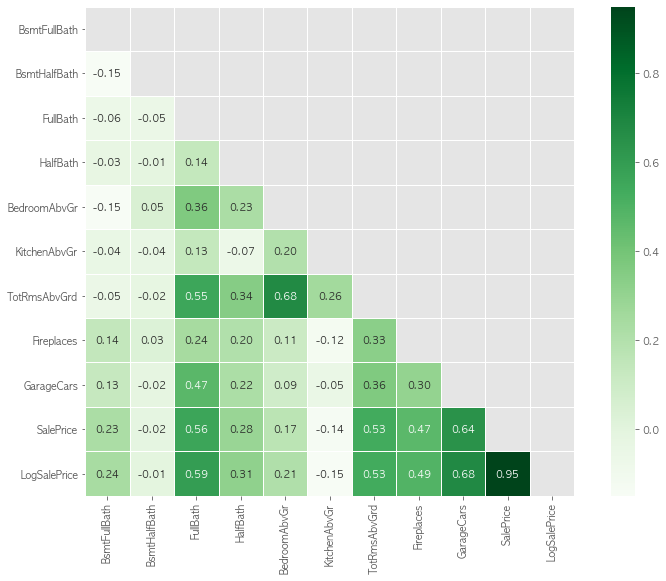

In [18]:
# 이산형 변수와 'SalePrice'의 관계 탐색
dis_list = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
            'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'SalePrice', 'LogSalePrice']

# 히트맵을 통해 상관계수 파악
cor_data = modify_data[dis_list].corr()

# 시각화 과정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (13, 9))

sns.heatmap(cor_data, mask = mask, cmap = 'Greens', square = True, annot = True, fmt = '.2f', linewidths = 0.5)
plt.show()

- **SalePrice** 변수와 **FullBath, TotRmsAbvGrd, GrageCars** 변수가 상관계수가 높음을 확인할 수 있다.


- **SalePrice** 변수와 상관계수가 높은 변수들은 **LogSalePrice** 변수와도 상관계수가 높음을 확인할 수 있다.


- 또한, **TotRmsAbvGrd & FullBath**, **TotRmsAbvGrd & BedroomAbvGr** 서로 상관계수가 높으며 어떠한 관계가 있는지 살펴보도록 하자.

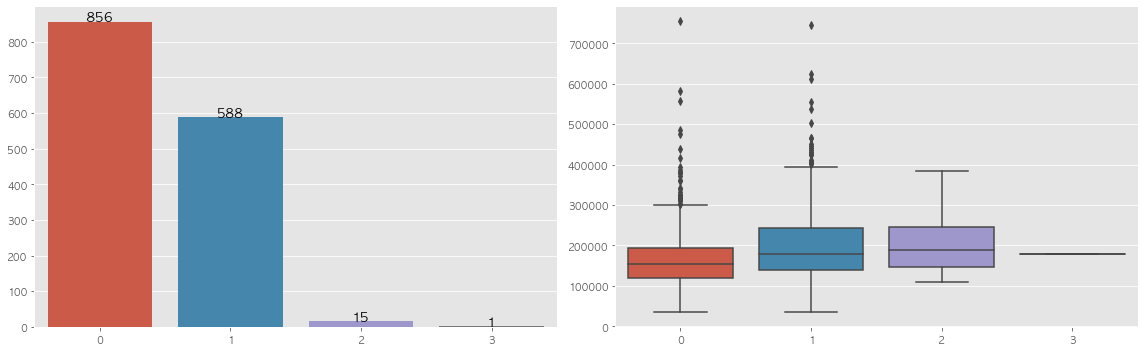

In [19]:
dis_compare_plot(x = 'BsmtFullBath', y = 'SalePrice', data = modify_data)

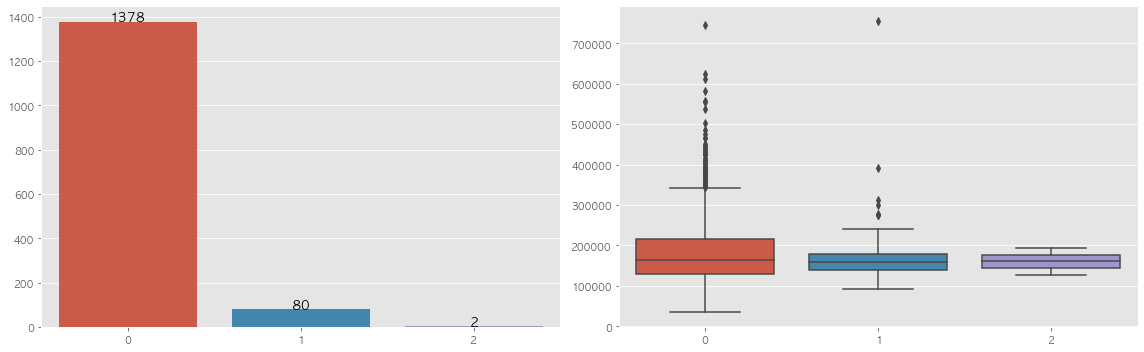

In [20]:
dis_compare_plot(x = 'BsmtHalfBath', y = 'SalePrice', data = modify_data)

- 지하의 Full Bathroom의 수가 증가할수록 가격이 높아짐을 확인할 수 있다.


- 지하의 Half Bathroom의 수에 따라서는 가격에 큰 차이가 없음을 확인할 수 있다.


- 두 변수를 사용하여 **BsmtTotalBath** 변수를 만들어주자.

### 5.2.1. 'BsmtTotalBath' 변수 생성

Shape of modify_data *Before Create*: (1460, 82) 

Shape of modify_data *After Create* : (1460, 83)


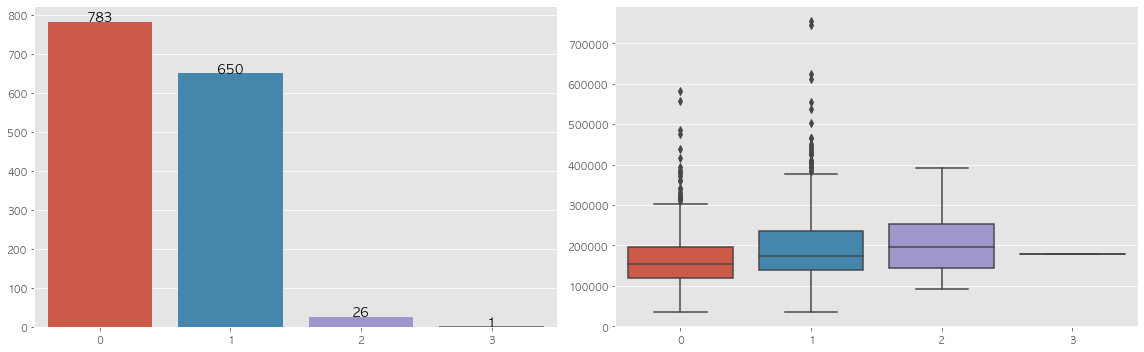

In [21]:
print('Shape of modify_data *Before Create*:', modify_data.shape, '\n')

# 'BsmtTotalBath' 변수 생성
modify_data['BsmtTotalBath'] = modify_data['BsmtFullBath'] + modify_data['BsmtHalfBath']
print('Shape of modify_data *After Create* :', modify_data.shape)

# 생성 후 함수 적용
dis_compare_plot(x = 'BsmtTotalBath', y = 'SalePrice', data = modify_data)

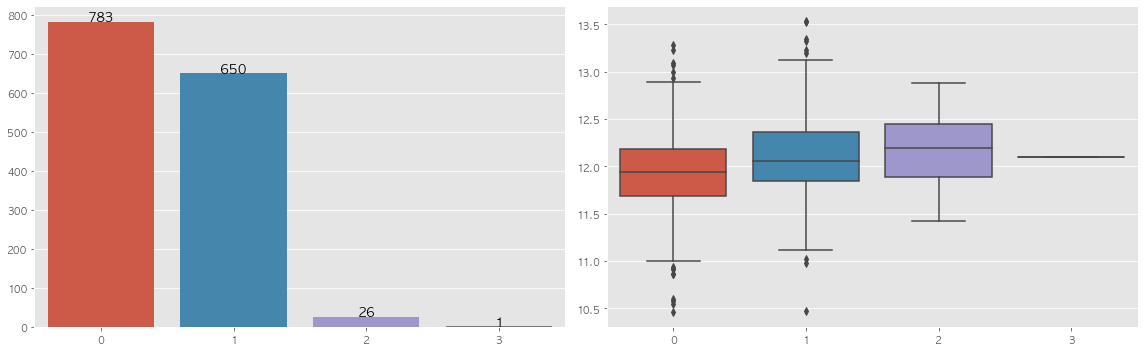

In [22]:
dis_compare_plot(x = 'BsmtTotalBath', y = 'LogSalePrice', data = modify_data)

- 지하의 Total Bathroom의 개수가 3개인 관측치를 제외하고 살펴보면, Bathroom의 개수가 증가할수록 가격도 증가함을 확인할 수 있다.

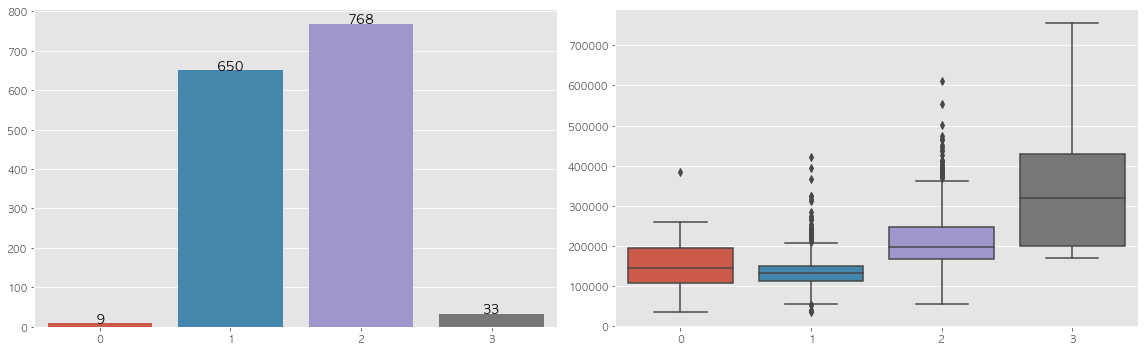

In [23]:
dis_compare_plot(x = 'FullBath', y = 'SalePrice', data = modify_data)

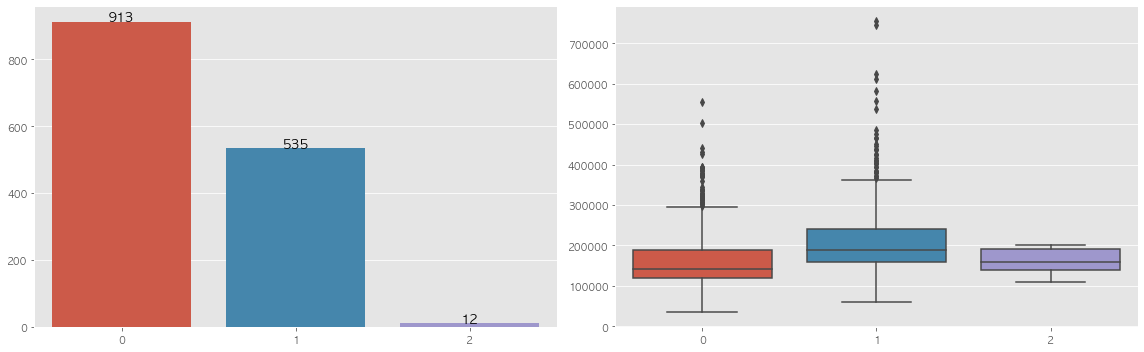

In [24]:
dis_compare_plot(x = 'HalfBath', y = 'SalePrice', data = modify_data)

- 지상의 Full Bathroom의 개수가 증가할수록 가격도 증가함을 확인할 수 있다.


- 또한, Half Bathroomdm의 개수가 1개일 때, 가격이 제일 높음을 확인할 수 있다.


- 두 변수를 이용하여 **GradeTotalBath**라는 변수를 만들어주자.

### 5.2.2. 'GradeTotalBath' 변수 생성

Shape of modify_data *Before Create*: (1460, 83) 

Shape of modify_data *After Create* : (1460, 84)


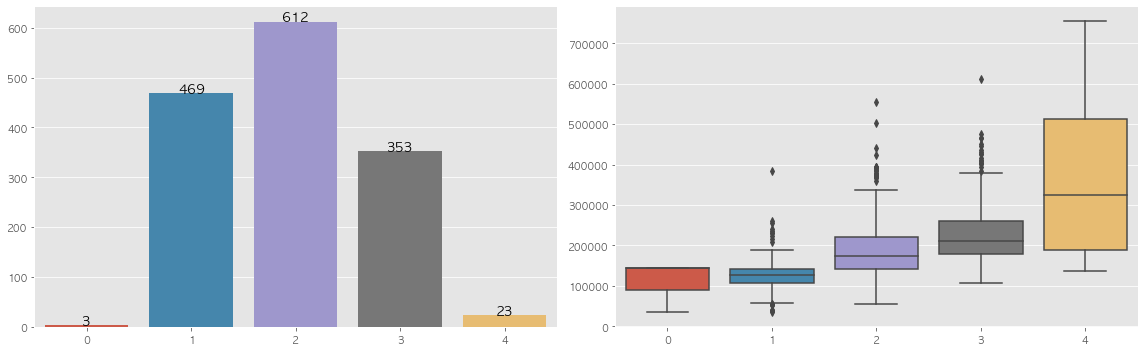

In [25]:
print('Shape of modify_data *Before Create*:', modify_data.shape, '\n')

# 'GradeTotalBath' 변수 생성
modify_data['GradeTotalBath'] = modify_data['FullBath'] + modify_data['HalfBath']
print('Shape of modify_data *After Create* :', modify_data.shape)

# 생성 후 함수 적용
dis_compare_plot(x = 'GradeTotalBath', y = 'SalePrice', data = modify_data)

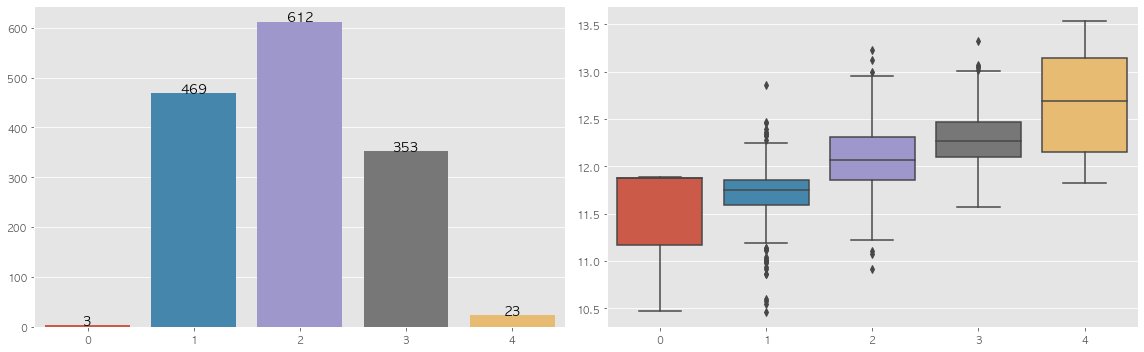

In [26]:
dis_compare_plot(x = 'GradeTotalBath', y = 'LogSalePrice', data = modify_data)

- **GradeTotalBath** 변수를 생성해주었을 때, 더욱더 뚜렷한 차이를 확인할 수 있다.

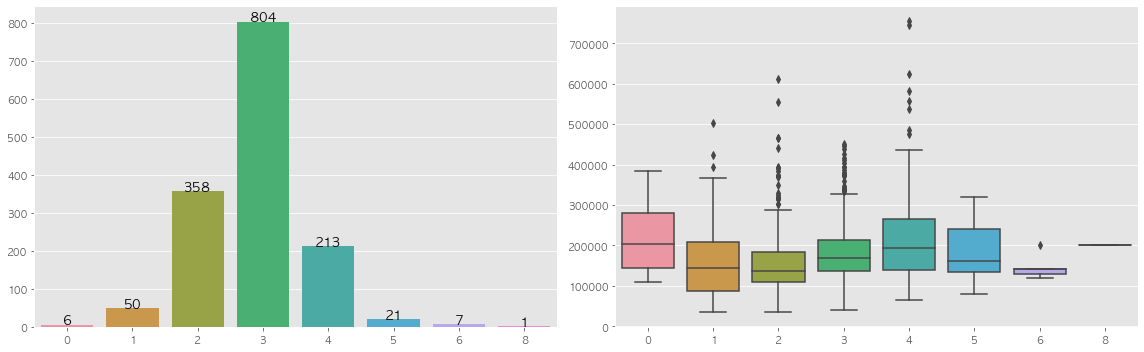

In [27]:
dis_compare_plot(x = 'BedroomAbvGr', y = 'SalePrice', data = modify_data)

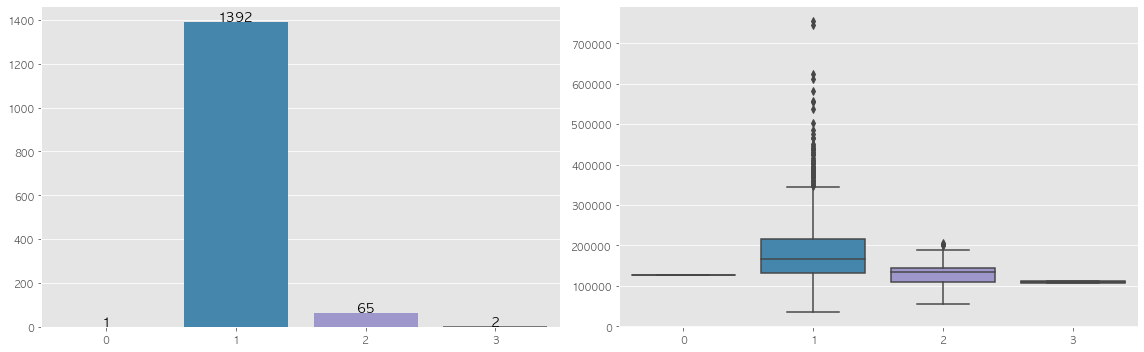

In [28]:
dis_compare_plot(x = 'KitchenAbvGr', y = 'SalePrice', data = modify_data)

- 지상 주방의 개수가 1개일 때보다 2개일 때 가격이 낮음을 확인할 수 있다.


- 주방의 개수가 2개일 때 왜 가격이 더 낮게 분포할까? (추후 확인)

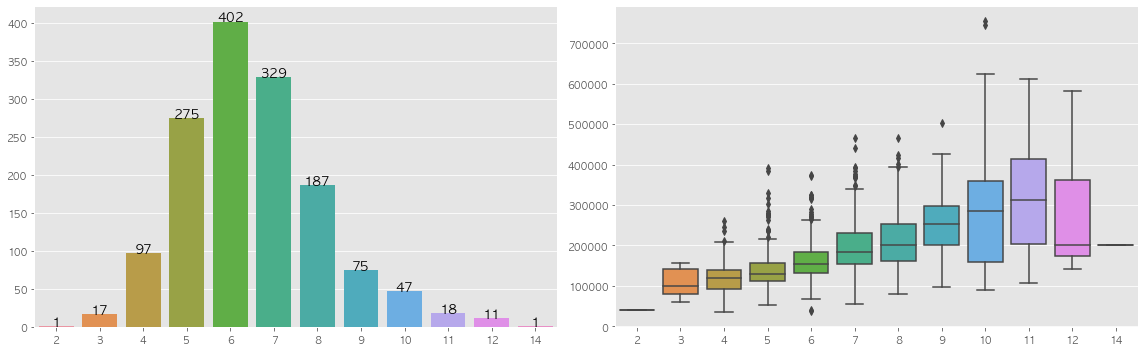

In [29]:
dis_compare_plot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = modify_data)

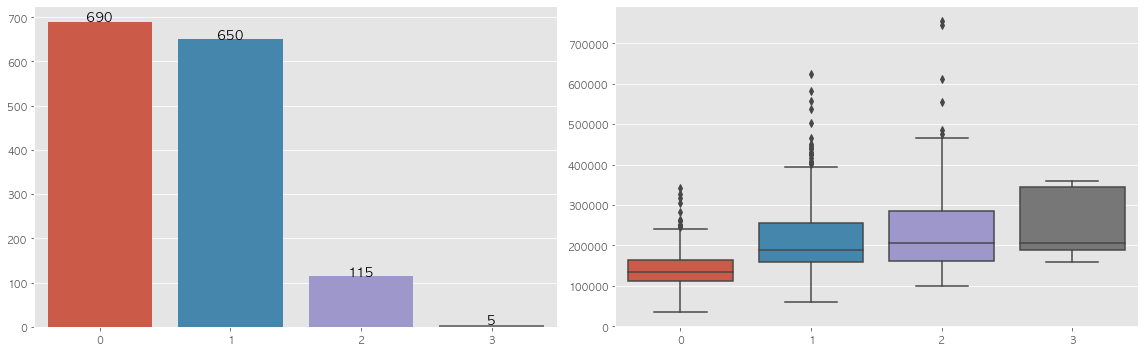

In [30]:
dis_compare_plot(x = 'Fireplaces', y = 'SalePrice', data = modify_data)

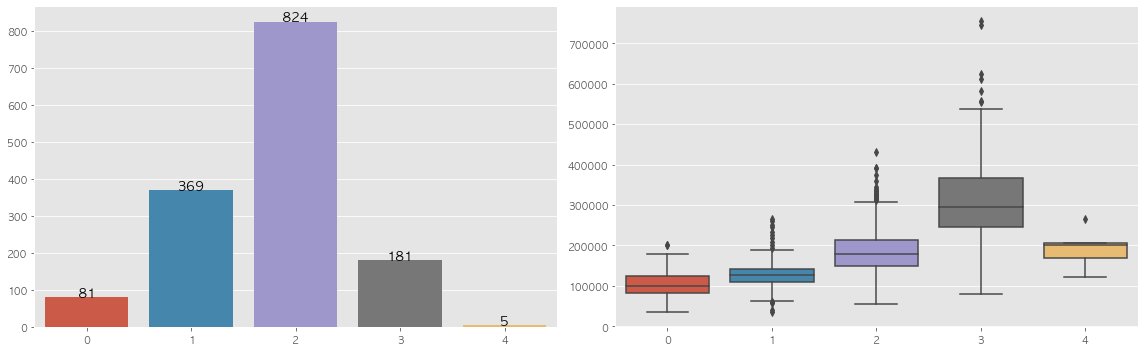

In [32]:
dis_compare_plot(x = 'GarageCars', y = 'SalePrice', data = modify_data)

## 5.3. Continuous Variables & SalePrice EDA

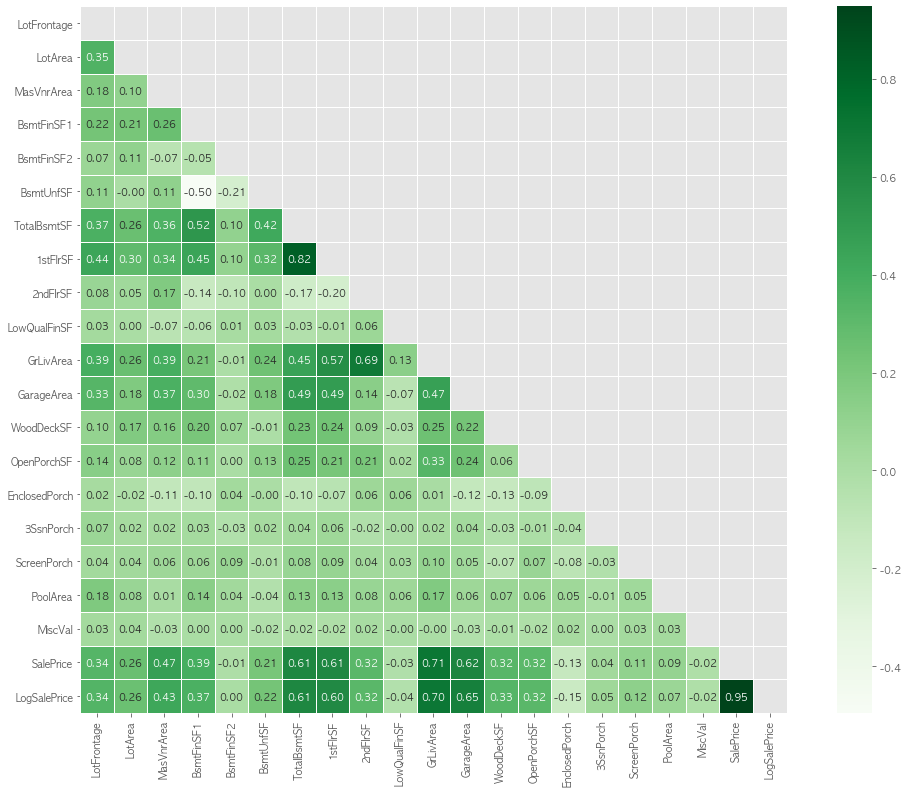

In [33]:
# 연속형 변수와 'SalePrice'의 관계 탐색
con_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'LogSalePrice']

# 히트맵을 통해 상관계수 파악
cor_data = modify_data[con_list].corr()

# 시각화 과정
mask = np.zeros_like(cor_data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (18, 13))

sns.heatmap(cor_data, mask = mask, cmap = 'Greens', square = True, annot = True, fmt = '.2f', linewidths = 0.5)
plt.show()

- **SalePrice** 변수와 **TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea** 변수가 상관계수가 높음을 확인할 수 있다.


- 마찬가지로 연속형 변수에서도 **SalePrice** 변수와 상관계수가 높은 변수들은 **LogSalePrice**와 높은 상관계수를 가지고 있음을 확인할 수 있다.


- 또한, **TotalBsmtSF & 1stFlrSF**, **2ndFlrSF & GrLivArea** 서로 상관계수가 높음을 확인할 수 있다.

Correlation cofficient between two variables : 0.338 

P-value of correlation coefficient between two variables : 0.0 



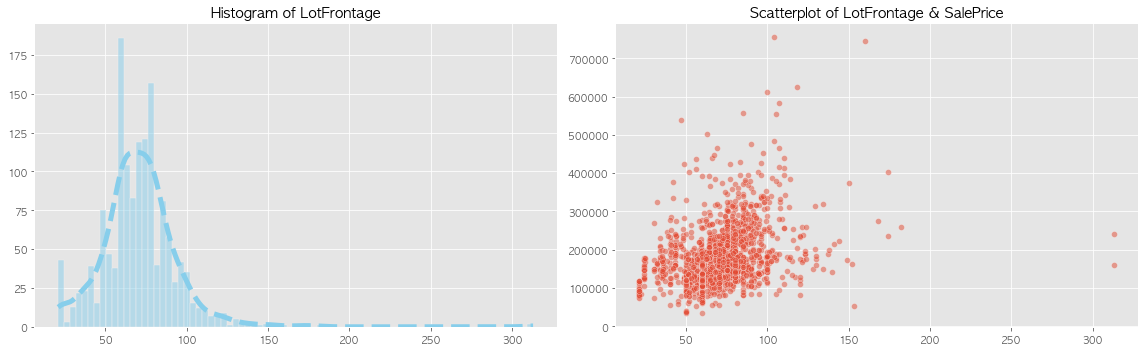

In [38]:
con_compare_plot(x = 'LotFrontage', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.343 

P-value of correlation coefficient between two variables : 0.0 



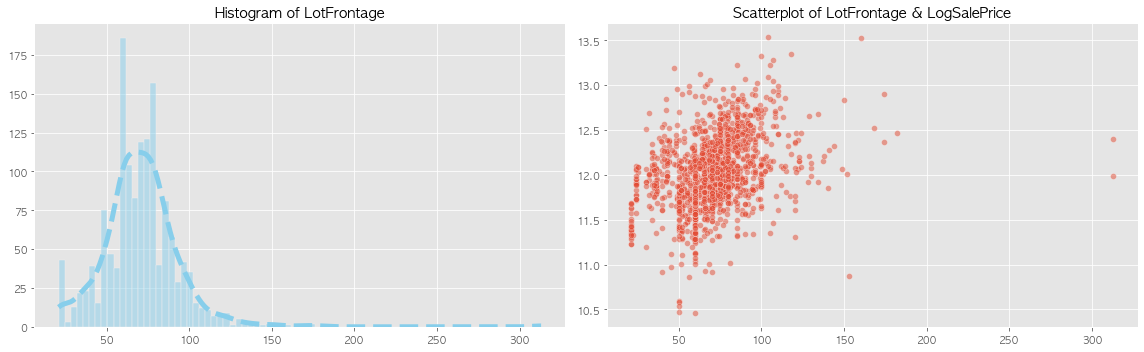

In [39]:
con_compare_plot(x = 'LotFrontage', y = 'LogSalePrice', data = modify_data)

- 로그를 취해주지 않은 두 변수 사이의 상관계수는 **0.338**, SalePrice에 로그를 취해준 두 변수 사이의 상관계수는 **0.343**으로 유의수준 0.05 범위에서 양의 상관관계가 존재한다.


- 두 변수의 Scatterplot을 살펴보면, **LotFrontage** 변수의 값이 300이 넘는 이상치가 존재함을 확인할 수 있다.


- **LotFrontage** 변수에 로그를 취해준 뒤, 다시 확인해보도록 하자.

### 5.3.1. 'Log LotFrontage' 변수 생성

Shape of modify_data *Before Create* : (1460, 84) 

Shape of modify_data *After Create* : (1460, 85) 

Correlation cofficient between two variables : 0.349 

P-value of correlation coefficient between two variables : 0.0 



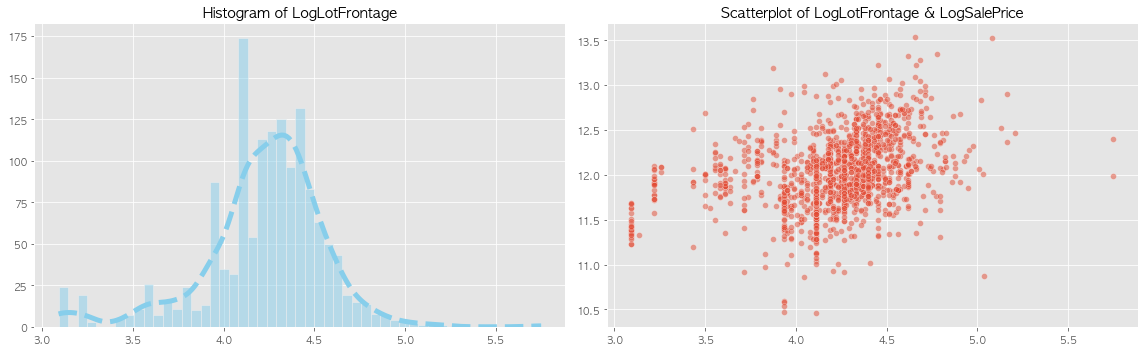

In [40]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogLotFrontage'] = np.log1p(modify_data['LotFrontage'])
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')

# 변수 생성 후 시각화
con_compare_plot(x = 'LogLotFrontage', y = 'LogSalePrice', data = modify_data)

- 두 변수에 로그화를 수행해 주었더니, 상관계수에 큰 변화가 없음을 확인할 수 있다.

Correlation cofficient between two variables : 0.264 

P-value of correlation coefficient between two variables : 0.0 



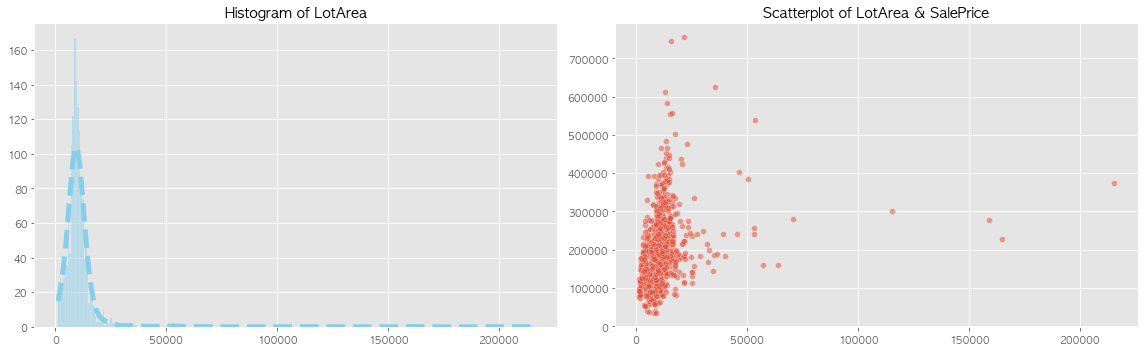

In [41]:
con_compare_plot(x = 'LotArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.257 

P-value of correlation coefficient between two variables : 0.0 



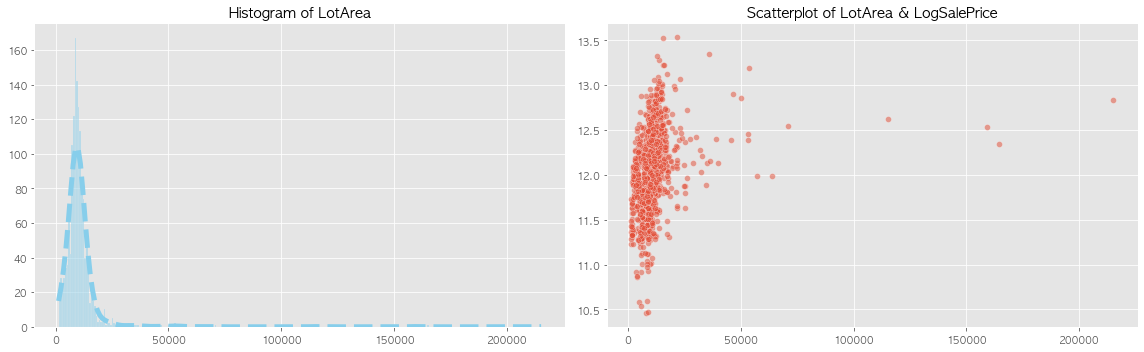

In [42]:
con_compare_plot(x = 'LotArea', y = 'LogSalePrice', data = modify_data)

### 5.3.2. 'Log LotArea' 변수 생성

Shape of modify_data *Before Create* : (1460, 85) 

Shape of modify_data *After Create* : (1460, 86) 

Correlation cofficient between two variables : 0.389 

P-value of correlation coefficient between two variables : 0.0 



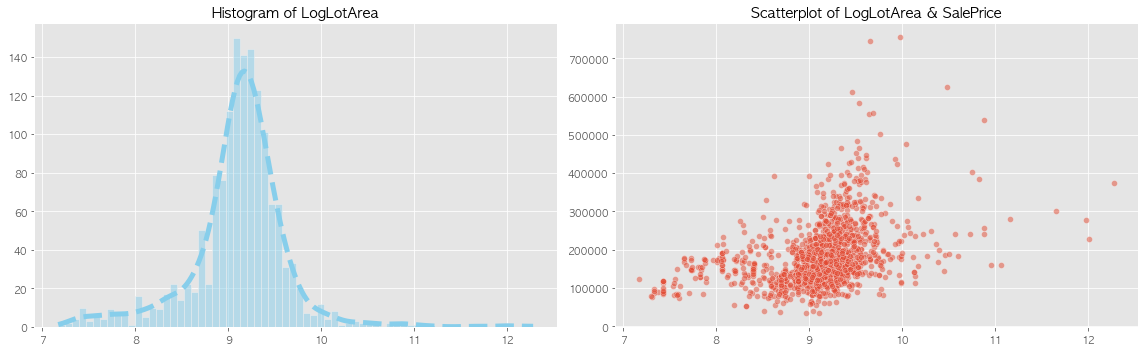

In [43]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogLotArea'] = np.log1p(modify_data['LotArea'])
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')

# 변수 생성 후 시각화
con_compare_plot(x = 'LogLotArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.4 

P-value of correlation coefficient between two variables : 0.0 



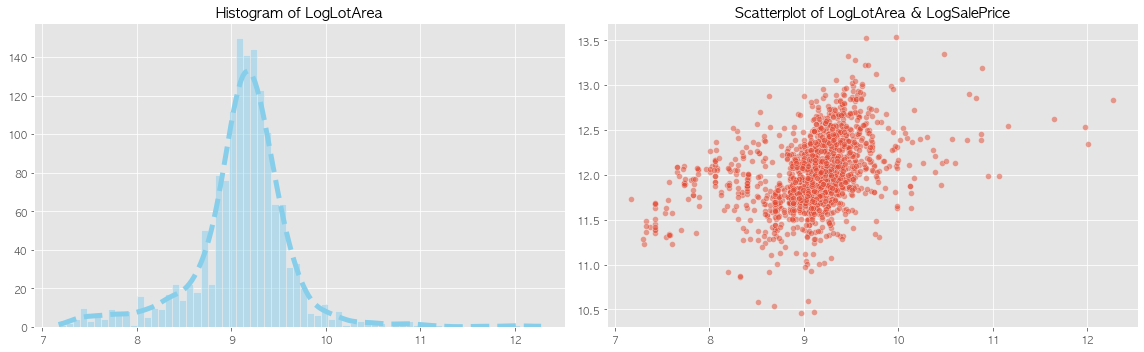

In [44]:
con_compare_plot(x = 'LogLotArea', y = 'LogSalePrice', data = modify_data)

- **LotArea**와 **SalePrice** 두 변수에 로그화를 취해주었더니 상관계수가 약 **0.4**로 올라갔음을 확인할 수 있다.

Correlation cofficient between two variables : 0.473 

P-value of correlation coefficient between two variables : 0.0 



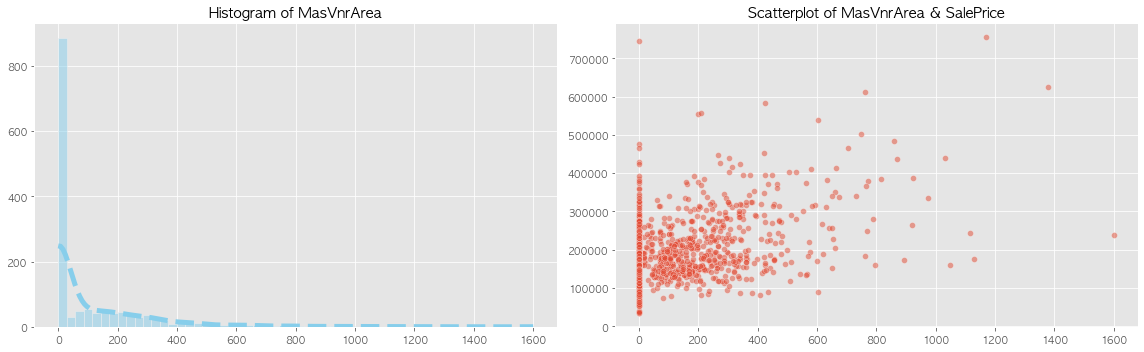

In [45]:
con_compare_plot(x = 'MasVnrArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.427 

P-value of correlation coefficient between two variables : 0.0 



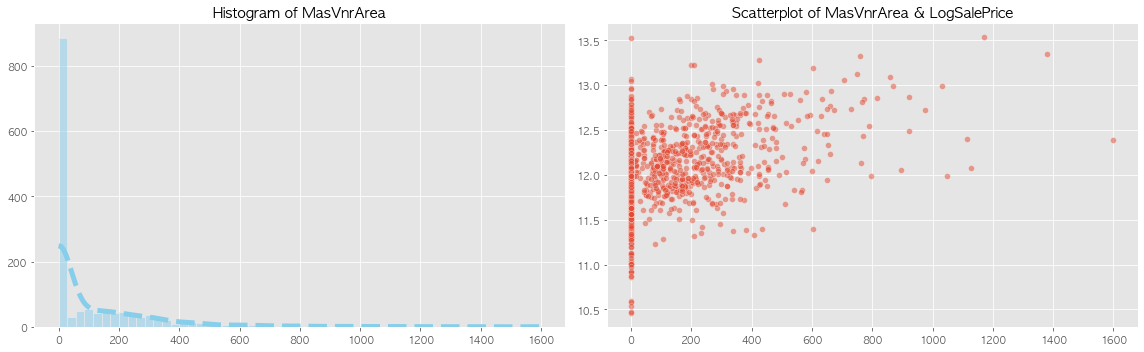

In [46]:
con_compare_plot(x = 'MasVnrArea', y = 'LogSalePrice', data = modify_data)

### 5.3.3. 'Log MasVnrArea' 변수 생성

Shape of modify_data *Before Create* : (1460, 86) 

Shape of modify_data *After Create* : (1460, 87) 

Correlation cofficient between two variables : 0.405 

P-value of correlation coefficient between two variables : 0.0 



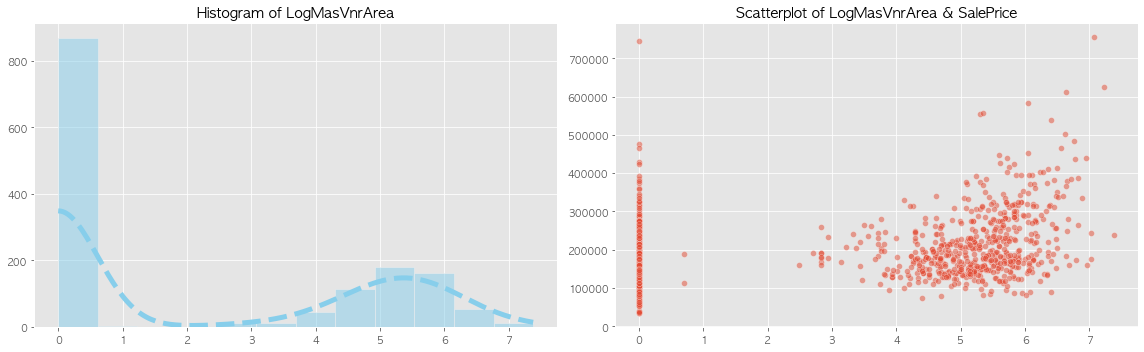

In [47]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogMasVnrArea'] = np.log1p(modify_data['MasVnrArea'])
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')

# 변수 생성 후 시각화
con_compare_plot(x = 'LogMasVnrArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.413 

P-value of correlation coefficient between two variables : 0.0 



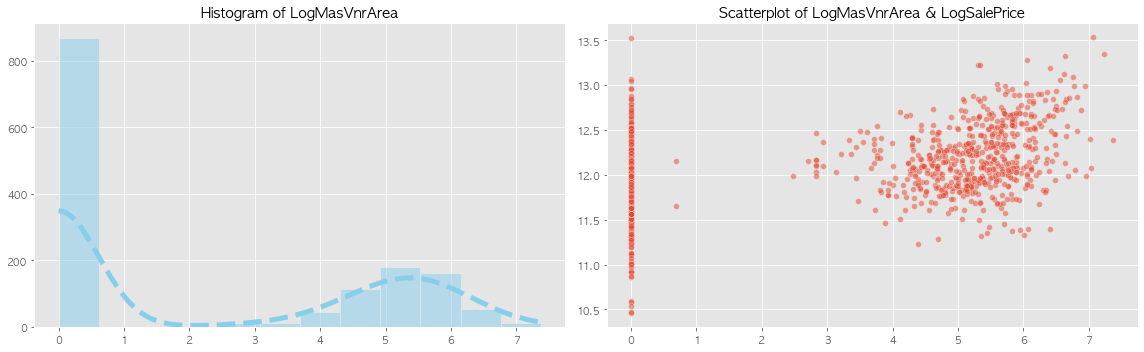

In [48]:
con_compare_plot(x = 'LogMasVnrArea', y = 'LogSalePrice', data = modify_data)

- **MasVnrArea**와 **SalePrice**는 두 변수에 로그를 취하지 않았을 때 상관계수가 가장 높음을 확인할 수 있다.


- 그 다음으로는, SalePrice 변수에만 로그를 취했을 때 상관계수가 약 **0.427**로 두번째이다.

Correlation cofficient between two variables : 0.386 

P-value of correlation coefficient between two variables : 0.0 



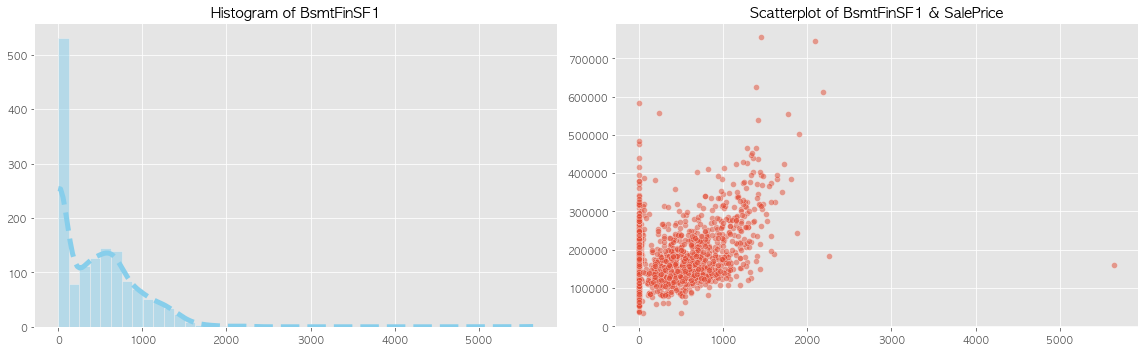

In [49]:
con_compare_plot(x = 'BsmtFinSF1', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.372 

P-value of correlation coefficient between two variables : 0.0 



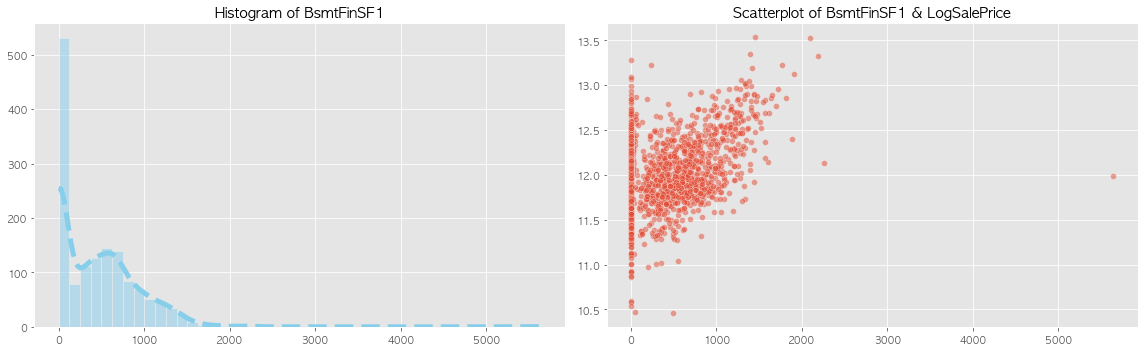

In [50]:
con_compare_plot(x = 'BsmtFinSF1', y = 'LogSalePrice', data = modify_data)

### 5.3.4. 'Log BsmtFinSF1' 변수 생성

Shape of modify_data *Before Create* : (1460, 87) 

Shape of modify_data *After Create* : (1460, 88) 

Correlation cofficient between two variables : 0.208 

P-value of correlation coefficient between two variables : 0.0 



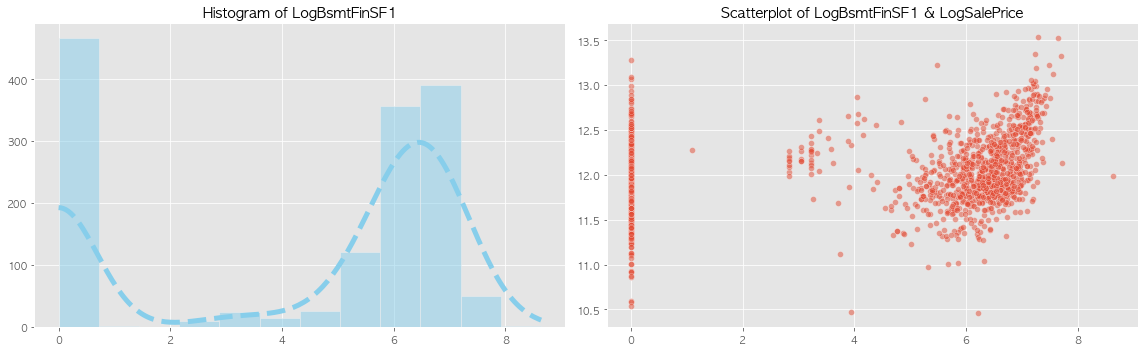

In [51]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogBsmtFinSF1'] = np.log1p(modify_data['BsmtFinSF1'])
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')

# 변수 생성 후 시각화
con_compare_plot(x = 'LogBsmtFinSF1', y = 'LogSalePrice', data = modify_data)

Correlation cofficient between two variables : -0.011 

P-value of correlation coefficient between two variables : 0.664 



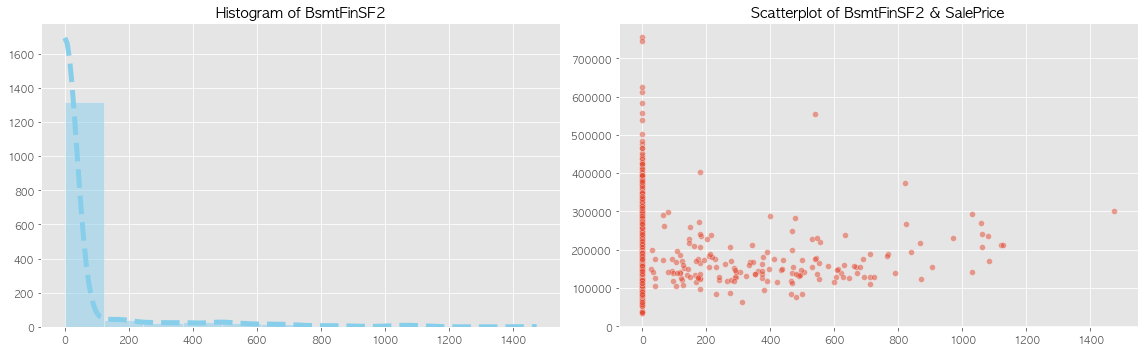

In [52]:
con_compare_plot(x = 'BsmtFinSF2', y = 'SalePrice', data = modify_data)

- **BsmtFinSF1** 변수와는 양의 상관관계가 존재하지만, **BsmtFinSF2** 와는 상관관계가 유의미하지 않음을 확인할 수 있다.


- **BsmtFinSF1** 변수에 로그를 취해주었을 때, 상관계수가 더 떨어졌음을 확인할 수 있다.

Correlation cofficient between two variables : 0.214 

P-value of correlation coefficient between two variables : 0.0 



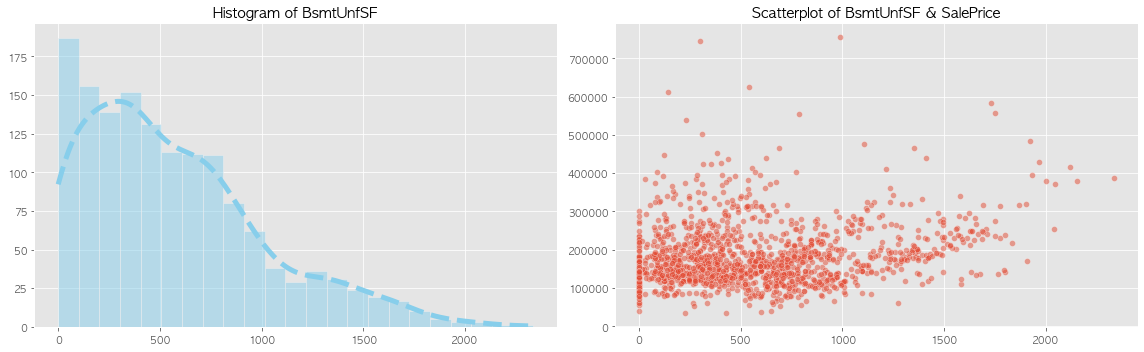

In [53]:
con_compare_plot(x = 'BsmtUnfSF', y = 'SalePrice', data = modify_data)

- **BsmtUnfSF**의 크기에 따라서는 가격에 큰 차이가 있음을 확인할 수 없다.

Correlation cofficient between two variables : 0.614 

P-value of correlation coefficient between two variables : 0.0 



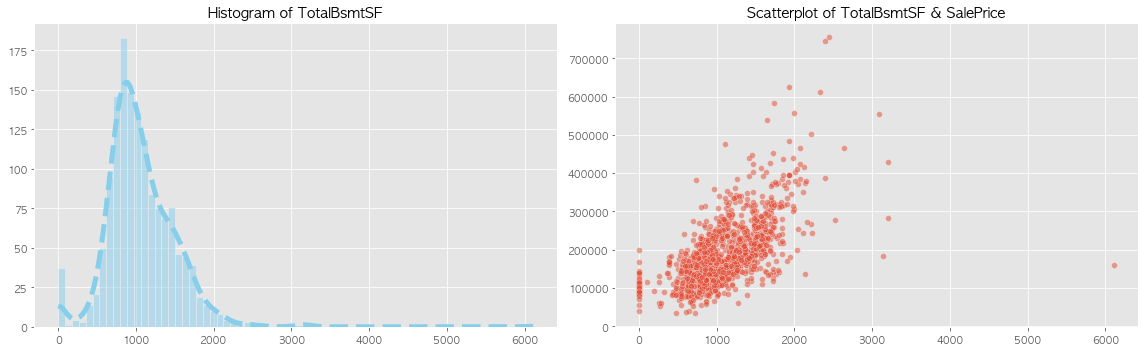

In [54]:
con_compare_plot(x = 'TotalBsmtSF', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.612 

P-value of correlation coefficient between two variables : 0.0 



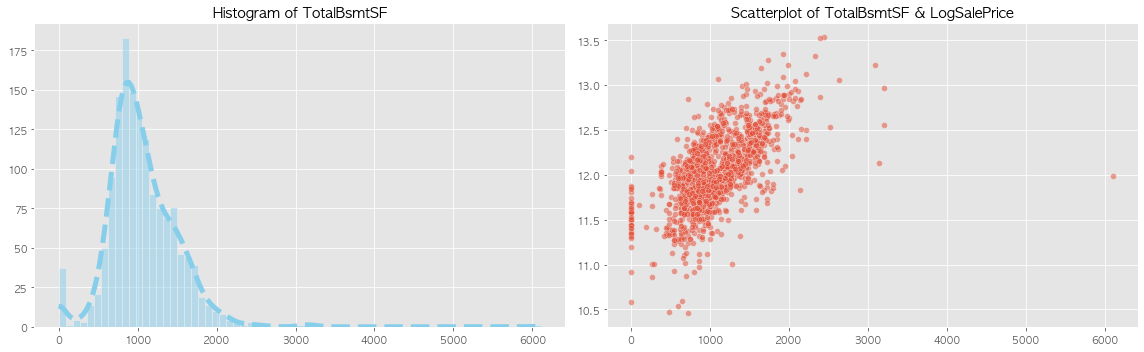

In [55]:
con_compare_plot(x = 'TotalBsmtSF', y = 'LogSalePrice', data = modify_data)

### 5.3.5. 'Log TotalBsmtSF' 변수 생성

Shape of modify_data *Before Create* : (1460, 88) 

Shape of modify_data *After Create* : (1460, 89) 

Correlation cofficient between two variables : 0.373 

P-value of correlation coefficient between two variables : 0.0 



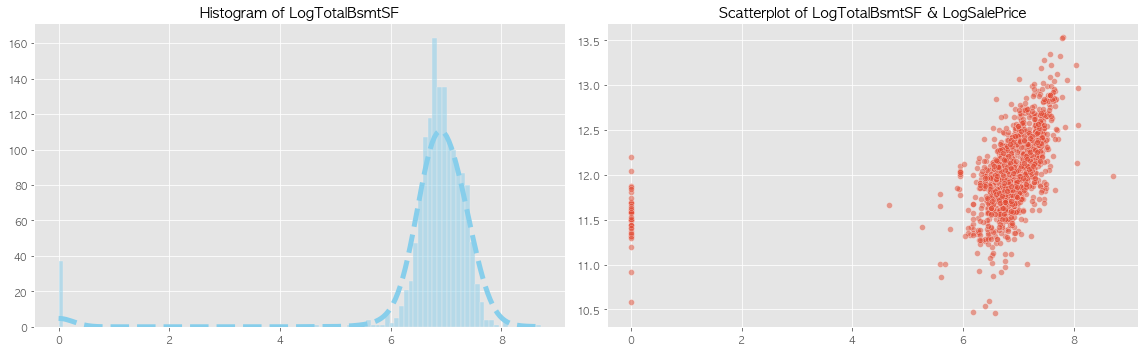

In [56]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['LogTotalBsmtSF'] = np.log1p(modify_data['TotalBsmtSF'])
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')

# 변수 생성 후 시각화
con_compare_plot(x = 'LogTotalBsmtSF', y = 'LogSalePrice', data = modify_data)

- **TotalBsmtSF** 변수는 다른 변수보다 SalePrice와 높은 양의 상관계수를 가지고 있다.


- 위의 시각화를 통해, **TotalBsmtSF** 변수에 이상치가 존재함을 확인할 수 있다.


- 또한, **TotalBsmtSF** 변수에 로그를 취했을 때, 상관계수가 더 떨어졌으므로 이상치를 대체해주도록 하자.

### 5.3.6. 'TotalBsmtSF' 변수 이상치 대체

Correlation cofficient between two variables : 0.641 

P-value of correlation coefficient between two variables : 0.0 



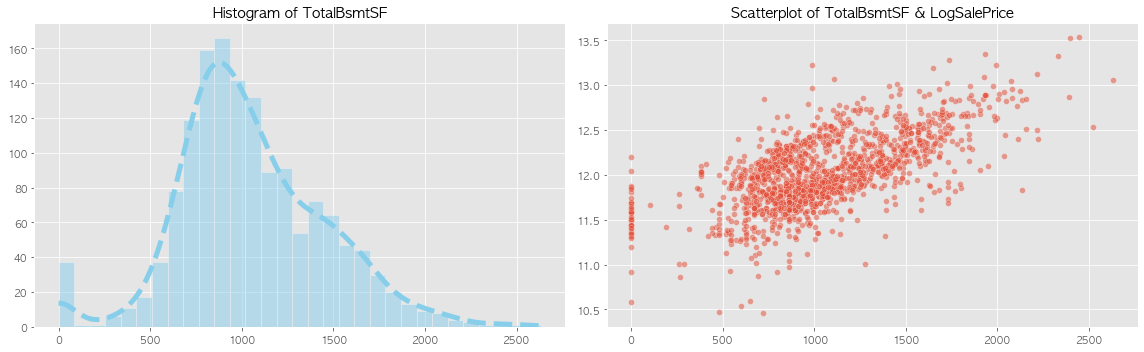

In [57]:
# 'TotalBsmtSF'의 값이 3000이 넘는 관측치들을 중앙값으로 대체해주자.
median_value = modify_data[modify_data['TotalBsmtSF'] < 3000]['TotalBsmtSF'].median()

modify_data.loc[modify_data['TotalBsmtSF'] > 3000, 'TotalBsmtSF'] = median_value

# 이상치 대체 후 시각화
con_compare_plot(x = 'TotalBsmtSF', y = 'LogSalePrice', data = modify_data)

- 이상치를 대체해주었을 때, 상관계수가 더 올라갔음을 확인할 수 있다.

Correlation cofficient between two variables : 0.606 

P-value of correlation coefficient between two variables : 0.0 



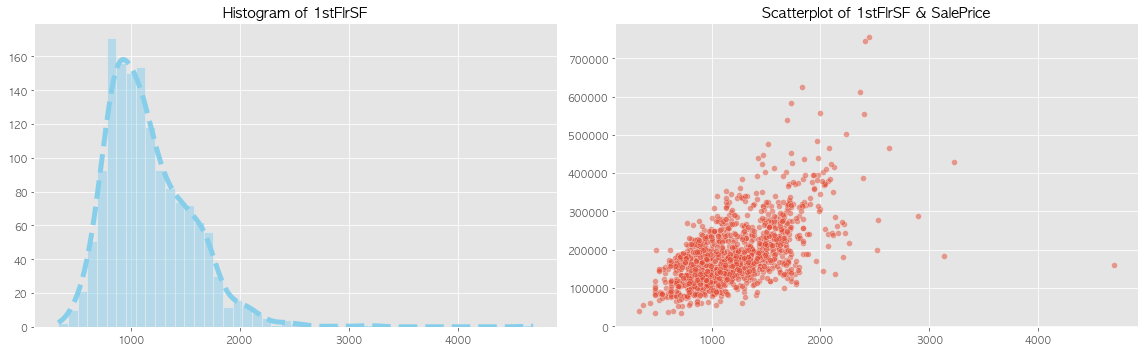

In [58]:
con_compare_plot(x = '1stFlrSF', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.597 

P-value of correlation coefficient between two variables : 0.0 



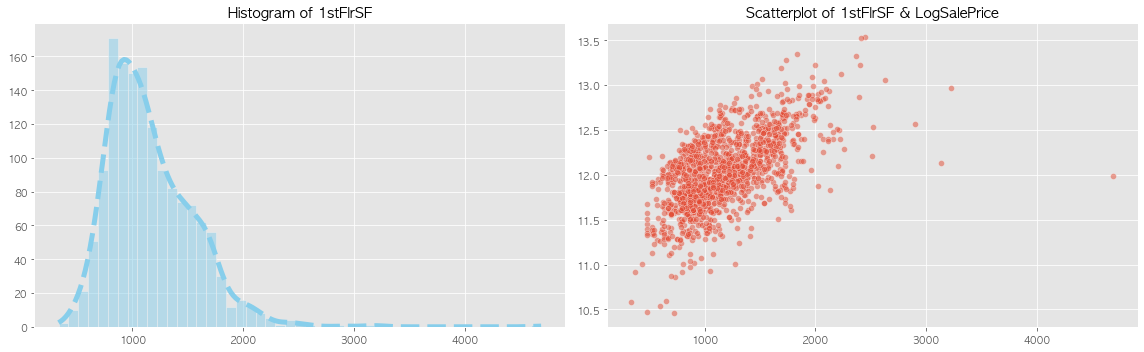

In [59]:
con_compare_plot(x = '1stFlrSF', y = 'LogSalePrice', data = modify_data)

- **1stFlrSF** 변수도 마찬가지로 이상치를 대체해주도록 하자.

### 5.3.7. '1stFlrSF' 변수 이상치 대체

Correlation cofficient between two variables : 0.618 

P-value of correlation coefficient between two variables : 0.0 



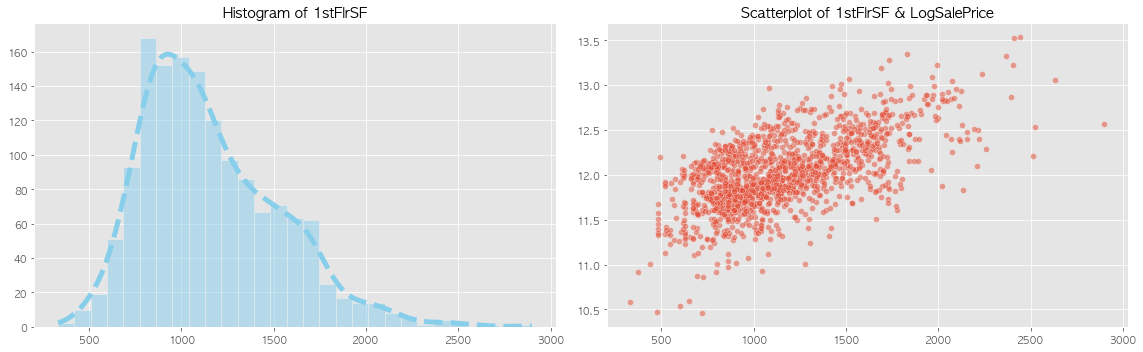

In [60]:
# '1stFlrSF'의 값이 3000이 넘는 관측치들을 중앙값으로 대체해주자.
median_value = modify_data[modify_data['1stFlrSF'] < 3000]['1stFlrSF'].median()

modify_data.loc[modify_data['1stFlrSF'] > 3000, '1stFlrSF'] = median_value

# 이상치 대체 후 시각화
con_compare_plot(x = '1stFlrSF', y = 'LogSalePrice', data = modify_data)

Correlation cofficient between two variables : 0.319 

P-value of correlation coefficient between two variables : 0.0 



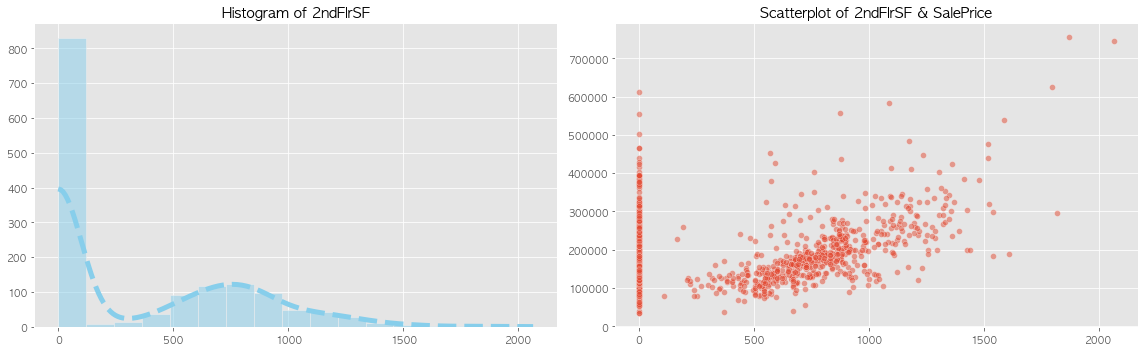

In [61]:
con_compare_plot(x = '2ndFlrSF', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.319 

P-value of correlation coefficient between two variables : 0.0 



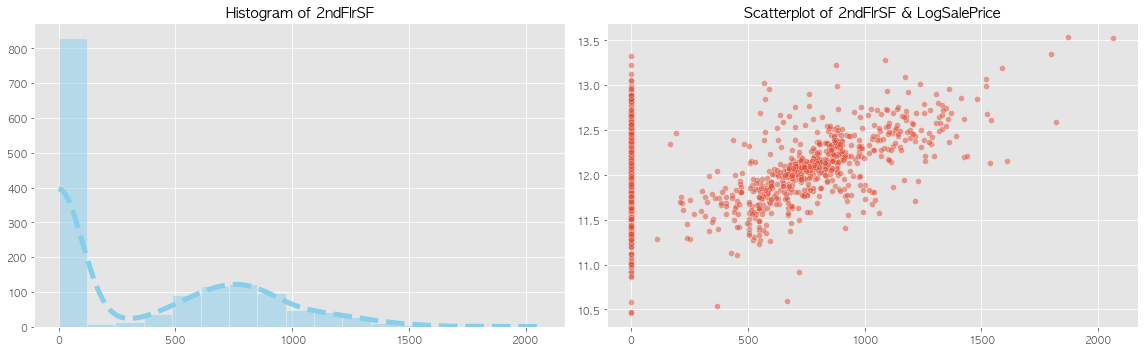

In [62]:
con_compare_plot(x = '2ndFlrSF', y = 'LogSalePrice', data = modify_data)

- 1층, 2층의 크기를 나타내는 두 변수 모두 가격과 양의 상관관계가 있음을 확인할 수 있다.


- 2층의 크기보다는 1층의 크기가 더 높은 상관계수를 가지고 있으며, 2층의 경우 0으로 관측된 값이 있음을 확인할 수 있다.

### 5.3.8. 'Exist2nd' 변수 생성

In [63]:
# 2층의 여부를 나타내는 변수 만들기
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['Exist2nd'] = modify_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
modify_data['Exist2nd'] = modify_data['Exist2nd'].astype('int64')
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of Exist2nd :', np.sort(modify_data['Exist2nd'].unique()))

Shape of modify_data *Before Create* : (1460, 89) 

Shape of modify_data *After Create* : (1460, 90) 

Unique values of Exist2nd : [0 1]


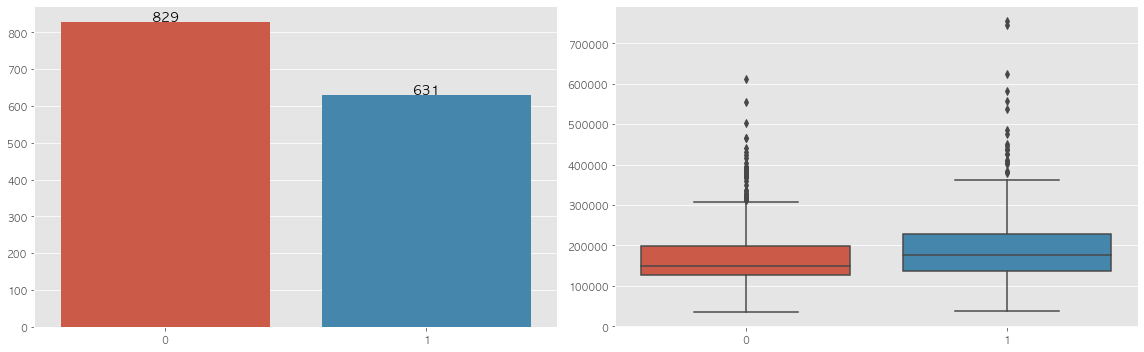

In [64]:
dis_compare_plot(x = 'Exist2nd', y = 'SalePrice', data = modify_data)

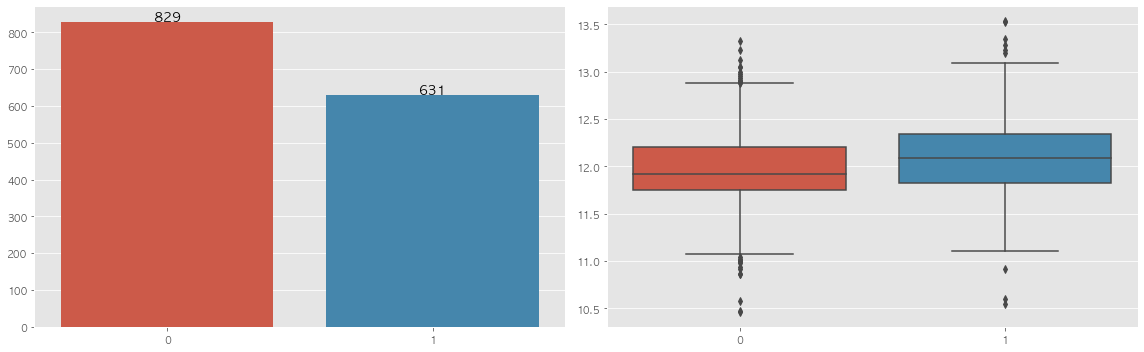

In [65]:
dis_compare_plot(x = 'Exist2nd', y = 'LogSalePrice', data = modify_data)

- 2층이 존재하는 경우에 존재하지 않는 경우보다 가격의 중앙값이 높음을 확인할 수 있다.

#### 5.3.8.1. 가설검정 1

- 위의 시각화를 통해, 2층의 보유 여부에 따라 가격의 차이가 있음을 확인할 수 있었다.


- 보다 정확하게 하기 위해서 가설검정을 수행하도록 하자.


- 가설은 아래와 같다.


> - $H_0$ : 2층의 보유 여부에 따라 가격의 평균 차이가 없다.<br><br>
> - $H_1$ : 2층의 보유 여부에 따라 가격의 평균 차이가 있다.

In [67]:
# 'Exist2nd'에 따른 'SalePrice' 가설 검정 수행
t_test(x = 'Exist2nd', y = 'SalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 0.03437581397709266으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = 5.211 

P-value = 0.0


- 검정 결과, t통계량 값은 약 **5.211**이고 유의확률이 매우 작음을 확인할 수 있다.


- 즉, 유의확률이 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서, 2층 여부에 따라 가격의 평균 차이가 있다고 할 수 있다.

In [68]:
# 'LogSalePrice' 가설검정 수행
t_test(x = 'Exist2nd', y = 'LogSalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 0.84203으로 유의수준 0.05보다 크므로 대립가설을 기각할 수 있다. 

statistic = 5.815 

P-value = 0.0


- 로그를 취해준 SalePrice 변수와의 검정 결과, t통계량 값은 약 **5.815**이고 유의확률이 매우 작음을 확인할 수 있다.


- 즉, 유의확률이 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서 SalePrice에 로그를 취해주었을 때도 2층 여부에 따라 가격의 평균 차이가 있다고 할 수 있다.


- 그렇다면, 방의 크기가 달라짐에 따라서 가격에 차이가 있을까?


- **0 : No have**, **1 : Small 2nd**, **2 : Same**, **3 : Big 2nd**를 의미하는 **ChangeFlr**변수를 만들어 주자.

### 5.3.9. 'ChangeFlr' 변수 생성

In [69]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['ChangeFlr'] = np.nan

for index in modify_data.index:
    
    first_value = modify_data.loc[index, '1stFlrSF']
    second_value = modify_data.loc[index, '2ndFlrSF']
    
    # 우선 2층이 없다면, 크기를 비교할 수 없으므로 0 대입
    if second_value == 0:
        modify_data.loc[index, 'ChangeFlr'] = 0
    
    # 1층의 크기가 더 큰 경우는 1
    elif first_value > second_value:
        modify_data.loc[index, 'ChangeFlr'] = 1
        
    # 1층과 2층의 크기가 같은 경우는 2
    elif first_value == second_value:
        modify_data.loc[index, 'ChangeFlr'] = 2
    
    # 2층의 크기가 더 큰 경우는 3
    else:
        modify_data.loc[index, 'ChangeFlr'] = 3
        
modify_data['ChangeFlr'] = modify_data['ChangeFlr'].astype('int64')
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of ChangeFlr :', np.sort(modify_data['ChangeFlr'].unique()))

Shape of modify_data *Before Create* : (1460, 90) 

Shape of modify_data *After Create* : (1460, 91) 

Unique values of ChangeFlr : [0 1 2 3]


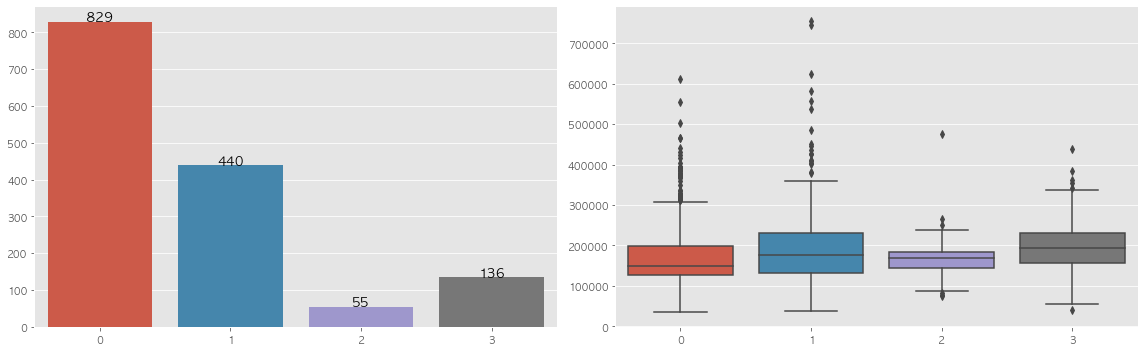

In [70]:
dis_compare_plot(x = 'ChangeFlr', y = 'SalePrice', data = modify_data)

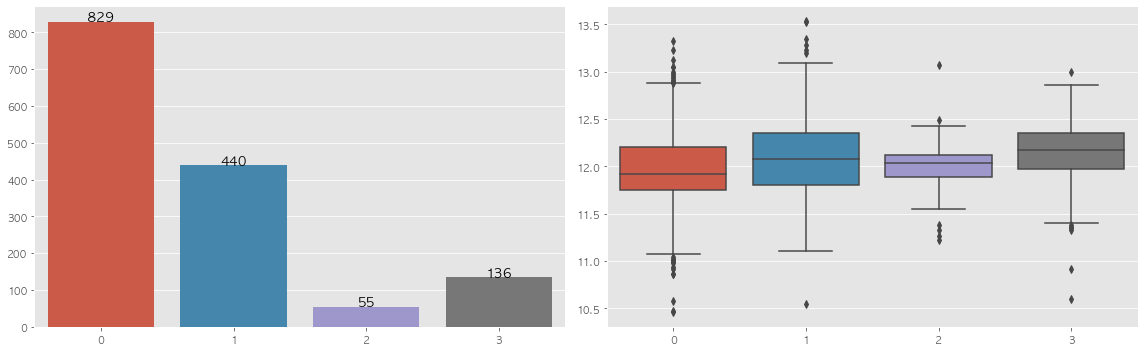

In [71]:
dis_compare_plot(x = 'ChangeFlr', y = 'LogSalePrice', data = modify_data)

#### 5.3.9.1. 가설검정 2

- 시각화를 통해, 새로 생성해준 변수에 따라서 큰 차이가 없는것으로 보인다.


- 하지만 가설검정을 통해 검정 결과를 확인해보도록 하자.


> - $H_0$ : 네 집단 가격의 평균은 같다.<br><br>
> - $H_1$ : 네 집단 가격의 평균은 같지 않다.

In [77]:
# 분산분석 수행
data1, data2, data3, data4 = [modify_data[modify_data['ChangeFlr'] == num]['SalePrice'] for num in range(4)]

# 함수 적용
anova_test(data1, data2, data3, data4, alpha = 0.05)

# 사후분석 수행
pval_data = sp.posthoc_conover(a = modify_data, val_col = 'LogSalePrice', group_col = 'ChangeFlr', p_adjust = 'holm')
display(pval_data)

Kruskal Statistic : 46.4186 

Kruskal P-value : 0.0


,0,1,2,3
0,1.000000e+00,0.000005,0.568673,3.858987e-08
1,5.174730e-06,1.000000,0.568673,4.256482e-02
2,5.686730e-01,0.568673,1.000000,4.256482e-02
3,3.858987e-08,0.042565,0.042565,1.000000e+00


- 2층의 여부에 따라서는 가격에 차이가 있지만, 1층과 2층의 크기차이에 따라서는 뚜렷한 차이를 확인할 수 없다.

Correlation cofficient between two variables : -0.026 

P-value of correlation coefficient between two variables : 0.328 



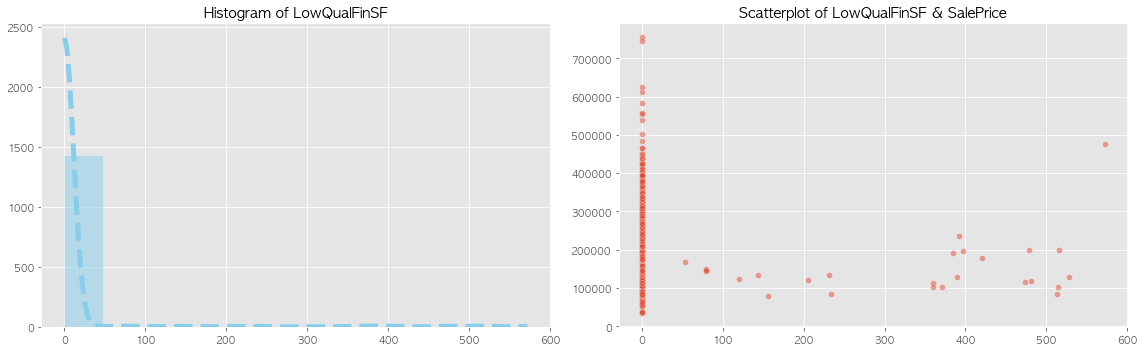

In [78]:
con_compare_plot(x = 'LowQualFinSF', y = 'SalePrice', data = modify_data)

- **LowQualFinSF** 변수는 SalePrice와 관계가 없음을 확인할 수 있다.

Correlation cofficient between two variables : 0.709 

P-value of correlation coefficient between two variables : 0.0 



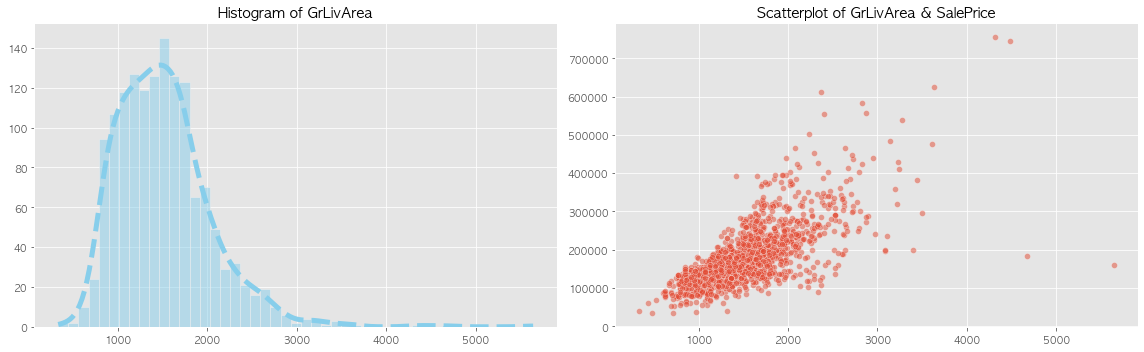

In [79]:
con_compare_plot(x = 'GrLivArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.701 

P-value of correlation coefficient between two variables : 0.0 



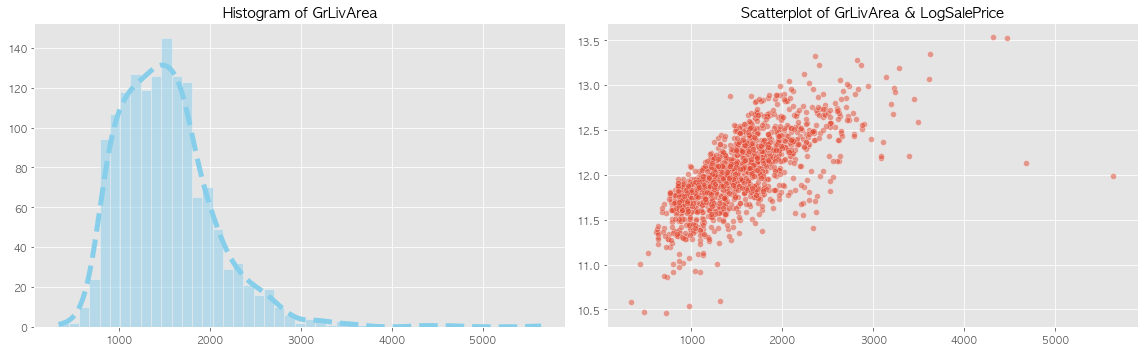

In [80]:
con_compare_plot(x = 'GrLivArea', y = 'LogSalePrice', data = modify_data)

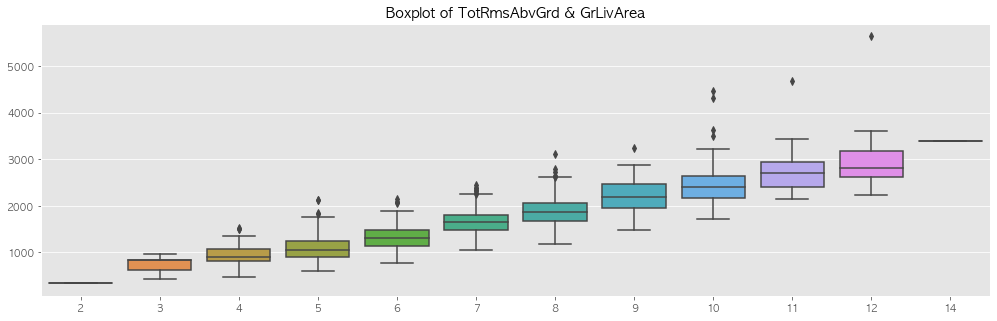

In [81]:
# 'TotRmsAbvGrd' & 'GrLivArea'
plt.figure(figsize = (17, 5))

sns.boxplot(x = 'TotRmsAbvGrd', y = 'GrLivArea', data = modify_data)
plt.title('Boxplot of TotRmsAbvGrd & GrLivArea')
plt.xlabel('')
plt.ylabel('')
plt.show()

- **GrLivArea** 변수는 SalePrice와 연관성이 높음을 확인할 수 있다.


- 또한, Boxplot을 통하여 욕실을 포함하지 않은 지상의 방의 개수가 많아질수록 생활 공간의 면적이 증가함을 확인할 수 있다.


- **GrLivArea** 변수도 이상치를 대체해준 뒤 확인해보도록 하자.

### 5.3.10. 'GrLivArea' 이상치 대체

Correlation cofficient between two variables : 0.711 

P-value of correlation coefficient between two variables : 0.0 



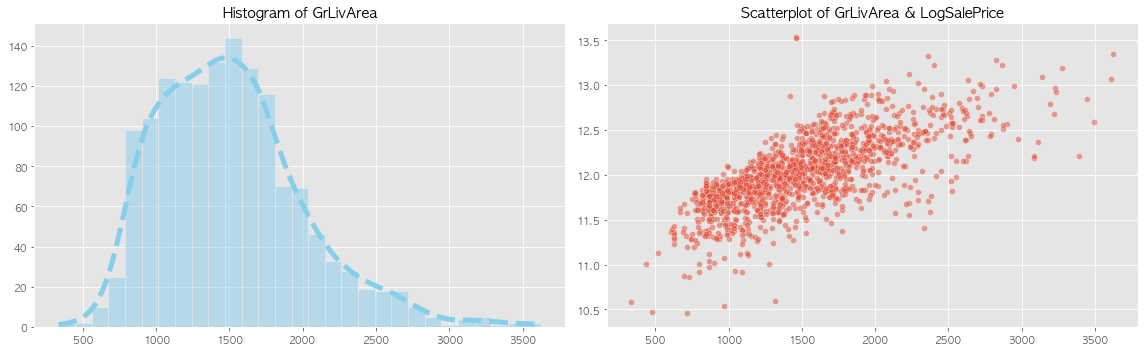

In [82]:
# 'GrLivArea'의 값이 4000이 넘는 관측치들을 중앙값으로 대체해주자.
median_value = modify_data[modify_data['GrLivArea'] < 4000]['GrLivArea'].median()

modify_data.loc[modify_data['GrLivArea'] > 4000, 'GrLivArea'] = median_value

# 이상치 대체 후 시각화
con_compare_plot(x = 'GrLivArea', y = 'LogSalePrice', data = modify_data)

Correlation cofficient between two variables : 0.623 

P-value of correlation coefficient between two variables : 0.0 



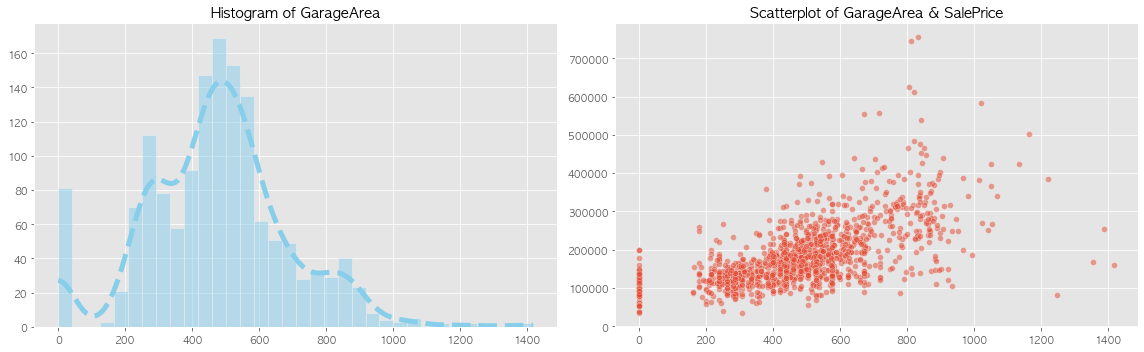

In [83]:
con_compare_plot(x = 'GarageArea', y = 'SalePrice', data = modify_data)

Correlation cofficient between two variables : 0.651 

P-value of correlation coefficient between two variables : 0.0 



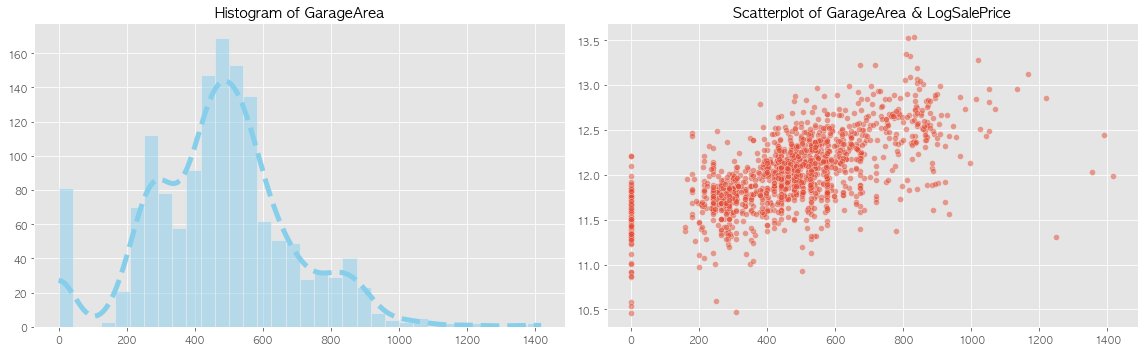

In [84]:
con_compare_plot(x = 'GarageArea', y = 'LogSalePrice', data = modify_data)

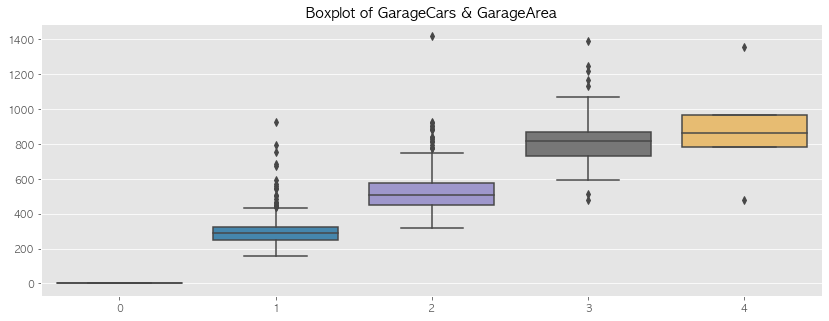

In [85]:
# 'GarageCars' & 'GarageArea'
plt.figure(figsize = (14, 5))

sns.boxplot(x = 'GarageCars', y = 'GarageArea', data = modify_data)
plt.title('Boxplot of GarageCars & GarageArea')
plt.xlabel('')
plt.ylabel('')
plt.show()

- **GarageArea** 변수도 SalePrice와 상관계수가 높음을 확인할 수 있다.


- 또한, Boxplot을 통하여 차고에 들어갈 수가 증가할수록 차고의 크기가 넓어짐을 확인할 수 있다.

### 5.3.11. 'GarageArea' 이상치 대체

Correlation cofficient between two variables : 0.666 

P-value of correlation coefficient between two variables : 0.0 



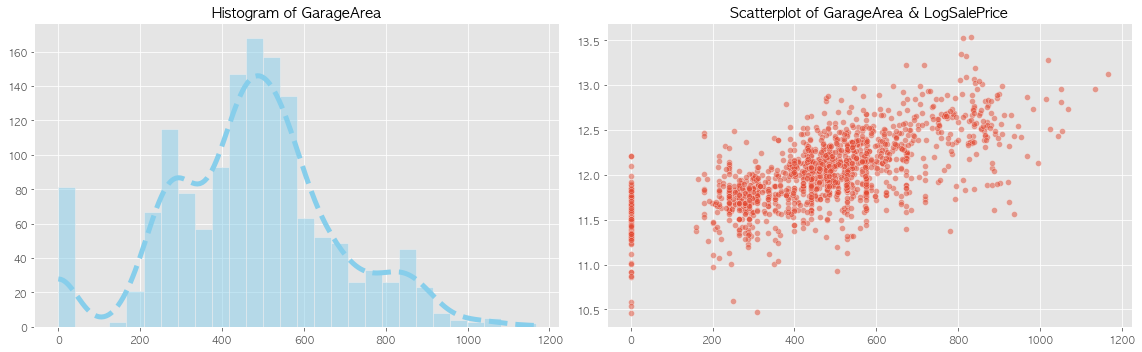

In [86]:
# 'GarageArea'의 값이 1200이 넘는 관측치들을 중앙값으로 대체해주자.
median_value = modify_data[modify_data['GarageArea'] < 1200]['GarageArea'].median()

modify_data.loc[modify_data['GarageArea'] > 1200, 'GarageArea'] = median_value

# 이상치 대체 후 시각화
con_compare_plot(x = 'GarageArea', y = 'LogSalePrice', data = modify_data)

Correlation cofficient between two variables : 0.324 

P-value of correlation coefficient between two variables : 0.0 



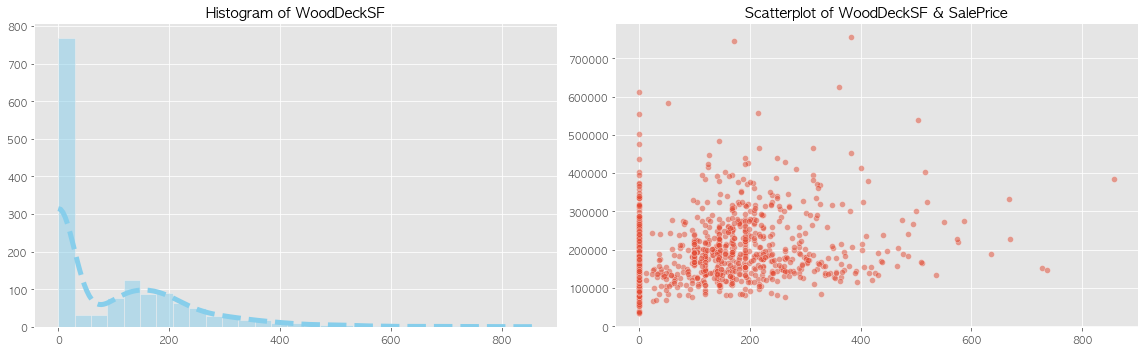

In [87]:
con_compare_plot(x = 'WoodDeckSF', y = 'SalePrice', data = modify_data)

- **WoodDeckSF** 변수의 경우 0의 값을 가지는 관측치가 많으므로, 보유 여부를 나타내는 변수를 만들어주자.

### 5.3.11. 'ExistWoodDeck' 변수 생성

In [88]:
print('Shape of modify_data *Before Creats* :', modify_data.shape, '\n')

modify_data['ExistWoodDeck'] = np.nan

for index in modify_data.index:
    
    if modify_data.loc[index, 'WoodDeckSF'] == 0:
        modify_data.loc[index, 'ExistWoodDeck'] = 0
    
    else:
        modify_data.loc[index, 'ExistWoodDeck'] = 1

print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of ExistWoodDeck :', np.sort(modify_data['ExistWoodDeck'].unique()))

Shape of modify_data *Before Creats* : (1460, 91) 

Shape of modify_data *After Create* : (1460, 92) 

Unique values of ExistWoodDeck : [0. 1.]


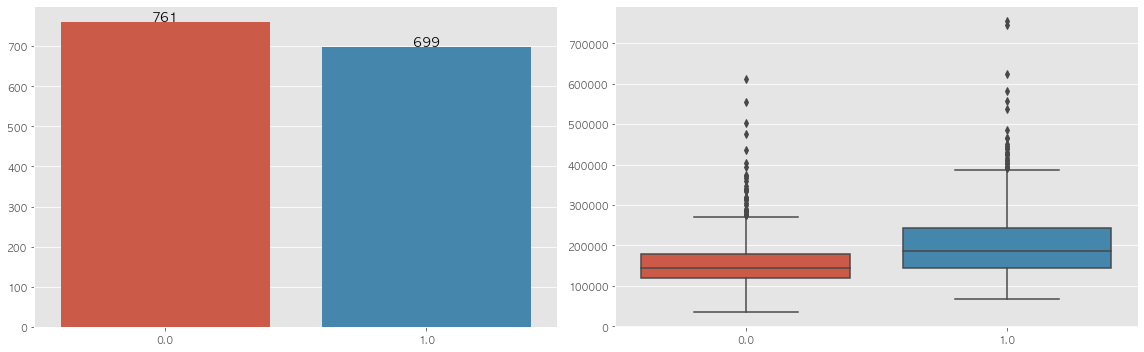

In [89]:
dis_compare_plot(x = 'ExistWoodDeck', y = 'SalePrice', data = modify_data)

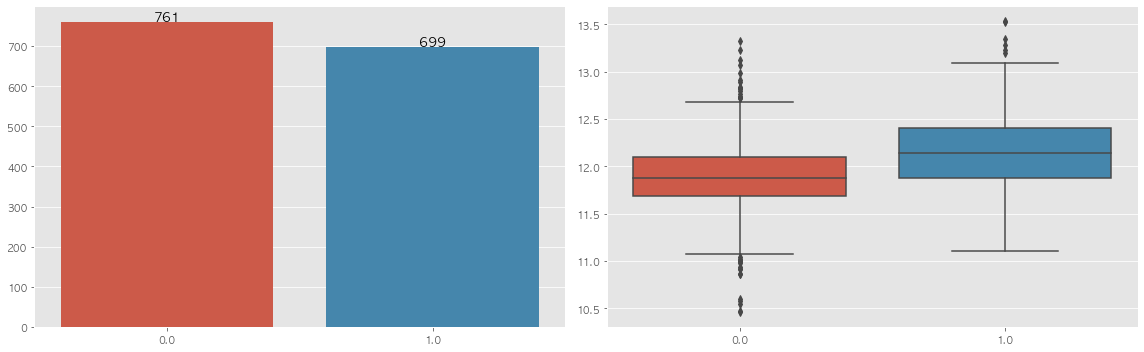

In [90]:
dis_compare_plot(x = 'ExistWoodDeck', y = 'LogSalePrice', data = modify_data)

#### 5.3.11.1. 가설검정 3

- 위의 시각화를 통해, WoodDeckSF 보유 여부에 따라서 가격의 차이가 있음을 확인할 수 있다.


- 가설검정을 통하여 검정해보도록 하자.

> - $H_0$ : WoodDeckSF 보유 여부에 따라 가격의 평균 차이가 없다.<br><br>
> - $H_1$ : WoodDeckSF 보유 여부에 따라 가격의 평균 차이가 있다.

In [91]:
t_test(x = 'ExistWoodDeck', y = 'SalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 3.4800270306881227e-09으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = -11.757 

P-value = 0.0


- 검정 결과, t통계량 값은 약 **-11.757**이고 유의확률이 매우 작음을 확인할 수 있다.


- 즉, 유의확률이 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서, WoodDeck 여부에 따라 가격의 평균 차이가 있다고 할 수 있다.


- 따라서, WoodDeckSF 변수 대신 **ExistWoodDeck** 변수를 사용하도록 하자.

In [92]:
t_test(x = 'ExistWoodDeck', y = 'LogSalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 0.10404으로 유의수준 0.05보다 크므로 대립가설을 기각할 수 있다. 

statistic = -12.913 

P-value = 0.0


- **OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch** 네 개의 변수 모두 0의 값을 가지는 관측치가 많음을 확인할 수 있다.


- 4개를 각각 보유하고 있는지를 나타내는 변수를 만들어주고, Total Porch Area 변수를 만들어주자.

### 5.3.12. 'TotalPorch', 'ExistPorch', 'ExistOpen', 'ExistEnclosed', 'Exit3Ssn', 'ExistScreen' 변수 생성

In [94]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

# 'TotalPorch' 변수 생성
modify_data['TotalPorch'] = modify_data['OpenPorchSF'] + modify_data['EnclosedPorch'] + \
                            modify_data['3SsnPorch'] + modify_data['ScreenPorch']

# 'TotalPorch' 변수를 사용하여 보유 여부 변수 생성
modify_data['ExistPorch'] = modify_data['TotalPorch'].apply(lambda x: 0 if x == 0 else 1)

# 'OpenPorchSF'
modify_data['ExistOpen'] = modify_data['OpenPorchSF'].apply(lambda x: 0 if x == 0 else 1)

# 'EnclosedPorch'
modify_data['ExistEnclosed'] = modify_data['EnclosedPorch'].apply(lambda x: 0 if x == 0 else 1)

# '3SsnPorch'
modify_data['Exist3Ssn'] = modify_data['3SsnPorch'].apply(lambda x: 0 if x == 0 else 1)

# 'ScreenPorch'
modify_data['ExistScreen'] = modify_data['ScreenPorch'].apply(lambda x: 0 if x == 0 else 1)

print('Shape of modify_data *After Create* :', modify_data.shape)

Shape of modify_data *Before Create* : (1460, 92) 

Shape of modify_data *After Create* : (1460, 98)


Correlation cofficient between two variables : 0.195 

P-value of correlation coefficient between two variables : 0.0 



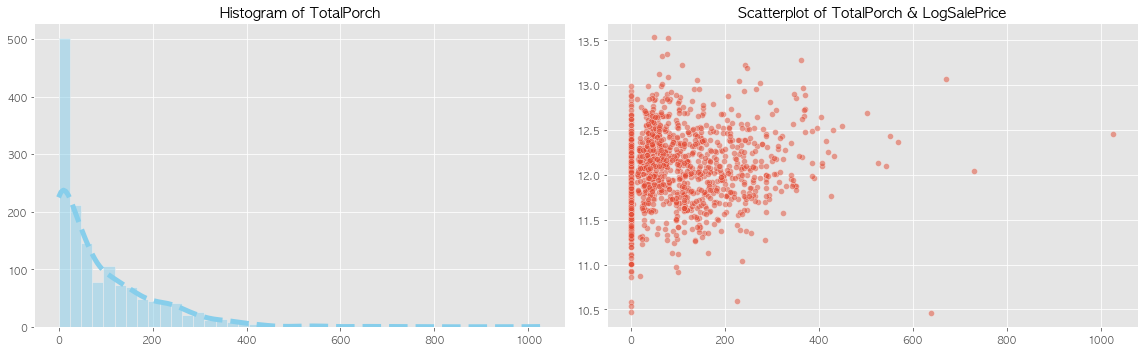

In [95]:
con_compare_plot(x = 'TotalPorch', y = 'LogSalePrice', data = modify_data)

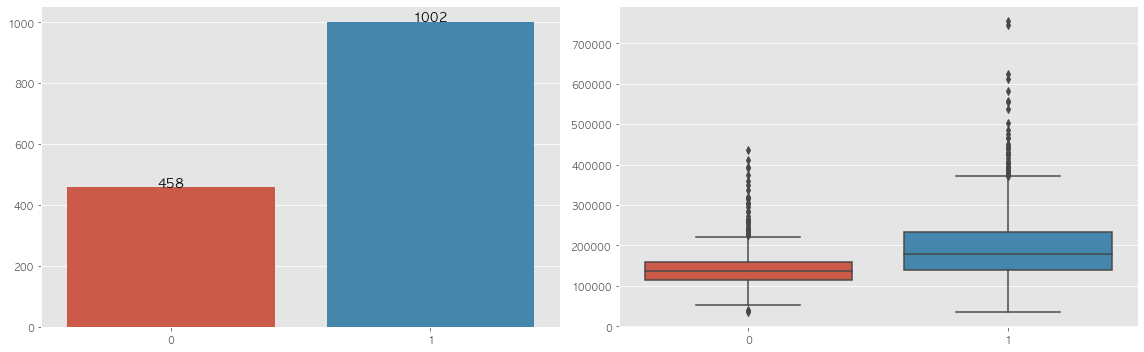

In [96]:
dis_compare_plot(x = 'ExistPorch', y = 'SalePrice', data = modify_data)

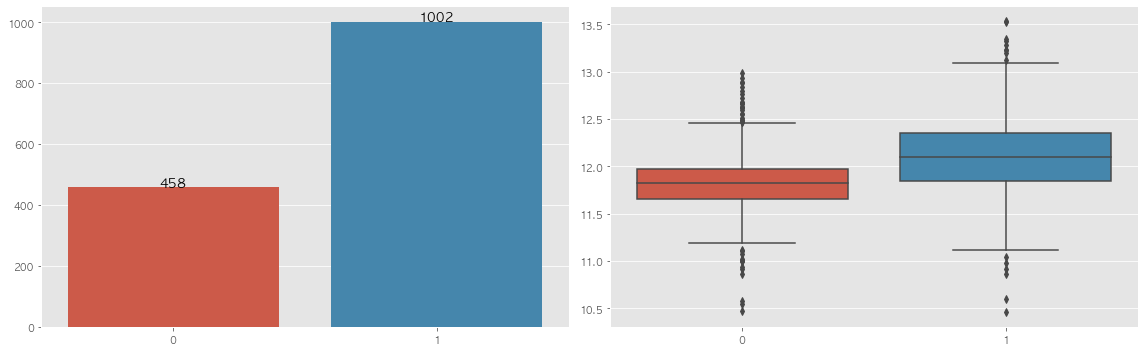

In [97]:
dis_compare_plot(x = 'ExistPorch', y = 'LogSalePrice', data = modify_data)

In [98]:
t_test(x = 'ExistPorch', y = 'SalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 7.688908267318494e-13으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = 13.736 

P-value = 0.0


- 우선 Porch의 총 면적을 합친 **TotalPorch**에 따라 가격에 큰 차이가 없음을 확인할 수 있다.


- Porch의 존재 여부에 따른 가격의 Boxplot을 통해 뚜렷한 차이를 확인할 수 있다.


- 검정 결과, t통계량의 값은 약 **13.736**이고 유의확률은 매우 작은값을 가지고 있다.


- 즉, 유의확률이 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 따라서 Porch의 존재 여부에 따라 가격의 평균 차이가 있다고 할 수 있다.

In [99]:
t_test(x = 'ExistPorch', y = 'LogSalePrice', data = modify_data, alpha = 0.05)

등분산 검정 결과 유의확률이 2.3194092068425504e-05으로 유의수준 0.05보다 작으므로 대립가설을 기각할 근거가 없다. 

statistic = 13.834 

P-value = 0.0


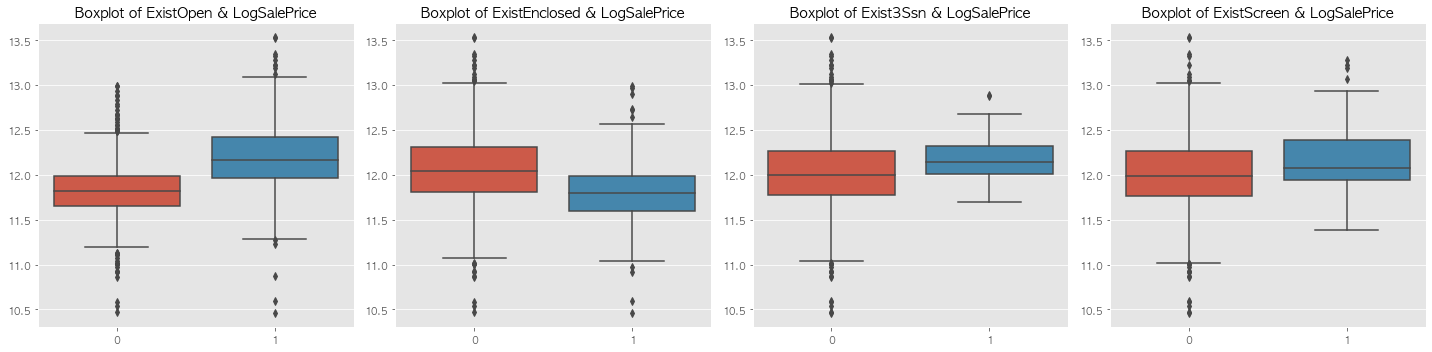

In [100]:
# 각 Porch의 여부에 따른 가격 시각화
fig, axes = plt.subplots(ncols = 4, figsize = (20, 5))

for index, feature in enumerate(['ExistOpen', 'ExistEnclosed', 'Exist3Ssn', 'ExistScreen']):
    
    sns.boxplot(x = feature, y = 'LogSalePrice', data = modify_data, ax = axes[index])
    axes[index].set_title('Boxplot of {} & LogSalePrice'.format(feature))
    axes[index].set_xlabel('')
    axes[index].set_ylabel('')
    
fig.tight_layout()

- 위의 시각화를 통하여, **Open**의 종류가 존재하는 경우에는 가격이 높으며 뚜렷한 차이가 남을 확인할 수 있다.


- 그러나 **Enclosed**의 경우는 존재하지 않을 때 가격이 더 높으며, 나머지 두 변수는 큰 차이를 확인할 수 없다.


- 따라서 보유하고 있지 않을 때 **0**, 보유하지만 Open인 경우 **1**, 보유하지만 Open이 아닌 경우 **2**를 나타내는 변수를 만들어주자.

### 5.3.13. 'NewExistPorch' 변수 생성 

In [101]:
print('Shape of modify_data *Before Create* :', modify_data.shape, '\n')

modify_data['NewExistPorch'] = np.nan

for index in modify_data.index:
    
    # Porch를 보유하고 있지 않은 경우
    if modify_data.loc[index, 'ExistPorch'] == 0:
        modify_data.loc[index, 'NewExistPorch'] = 1
        
    # Porch를 보유하면서 Open 종류를 가지고 있는 경우
    elif (modify_data.loc[index, 'ExistPorch'] == 1) & (modify_data.loc[index, 'ExistOpen'] == 1):
        modify_data.loc[index, 'NewExistPorch'] = 2
        
    else:
        modify_data.loc[index, 'NewExistPorch'] = 3
        
print('Shape of modify_data *After Create* :', modify_data.shape, '\n')
print('Unique values of NewExistPorch :', np.sort(modify_data['NewExistPorch'].unique()))

Shape of modify_data *Before Create* : (1460, 98) 

Shape of modify_data *After Create* : (1460, 99) 

Unique values of NewExistPorch : [1. 2. 3.]


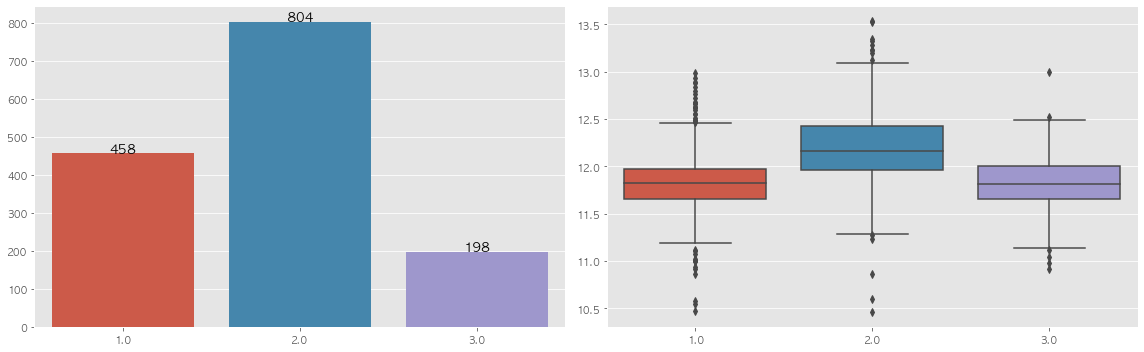

In [102]:
dis_compare_plot(x = 'NewExistPorch', y = 'LogSalePrice', data = modify_data)